>Attached are two csv files: 1) of the forecast draft that I ran yesterday, “draft_forecast.csv”, 2) the observational dataset I used to make the forecast, “reconciled_timeseries.csv”. Could you take a look over these and just make sure that things look good overall, esp. that on/after the forecast start date (2021-08-23) the tick predictions aren’t unrealistic? I think that the output of the forecast() function makes the “.mean” column the forecast.
>
>If you’re trying to graph any of the data, the .model column indicates which model type generated the forecast, “amam_filled”  indicates a distribution, I think, of the forecasted tick average, “.mean”. You’ll probably also need to group by “site_id” and “ensemble”.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
reconciled_timeseries = pd.read_csv('/Users/smurphy/Library/Mobile Documents/com~apple~CloudDocs/Github/other/tick_met/reconciled_timeseries.csv', 
                                    index_col = [0, 1],
                                    parse_dates = True,
                                   )
draft_forecast = pd.read_csv('/Users/smurphy/Library/Mobile Documents/com~apple~CloudDocs/Github/other/tick_met/draft_forecast.csv',
                             index_col = [0, 1, 2, 6],
                             parse_dates = True,
                            )

In [3]:
draft_forecast[(draft_forecast.index.get_level_values(3) == 1) & (draft_forecast.index.get_level_values(0) == 'BLAN')].columns

Index(['amam_filled', '.mean', 'mean_vpd', 'iso_year', 'iso_week', 'mean_temp',
       'min_temp', 'max_temp', 'rh_min', 'rh_max', 'mean_precip_mm',
       'sum_precip_mm', 'dd', 'thirty_day_dd', 'dd_30d_rollsum_lag34',
       'dd_30d_rollsum_lag42', 'dd_30d_rollsum_lag50',
       'dd_30d_rollsum_prev_week', 'cume_dd_prev_week', 'jd',
       'amam_4wk_rollmean_lag1', 'mean_vpd_4wk_rollmean_lag1',
       'amam_4wk_rollmean_lag50', 'mean_vpd_4wk_rollmean_lag50', 'amam_lag1',
       'amam_lag2', 'amam_lag3', 'amam_lag4', 'iso_week_num',
       'dd_rollsum_prev_week'],
      dtype='object')

In [4]:
draft_forecast.index.get_level_values(0).unique()

Index(['BLAN', 'KONZ', 'LENO', 'ORNL', 'OSBS', 'SCBI', 'SERC', 'TALL', 'UKFS'], dtype='object', name='site_id')

In [5]:
draft_forecast.index.get_level_values(1).unique()

Index(['basic_arima', 'basic_prophet', 'standard_arima', 'standard_prophet'], dtype='object', name='.model')

In [6]:
mtype = draft_forecast.index.get_level_values(1).unique()[0]
siselect = draft_forecast.index.get_level_values(0).unique()[0]


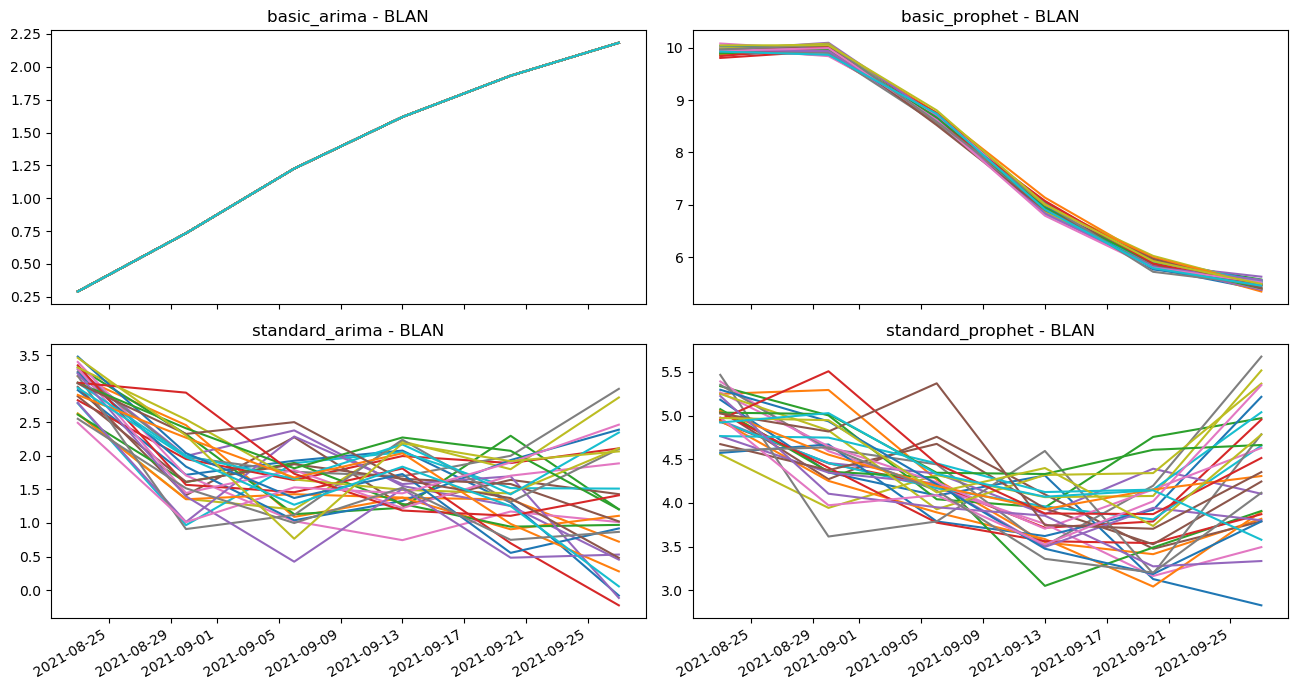

<Figure size 640x480 with 0 Axes>

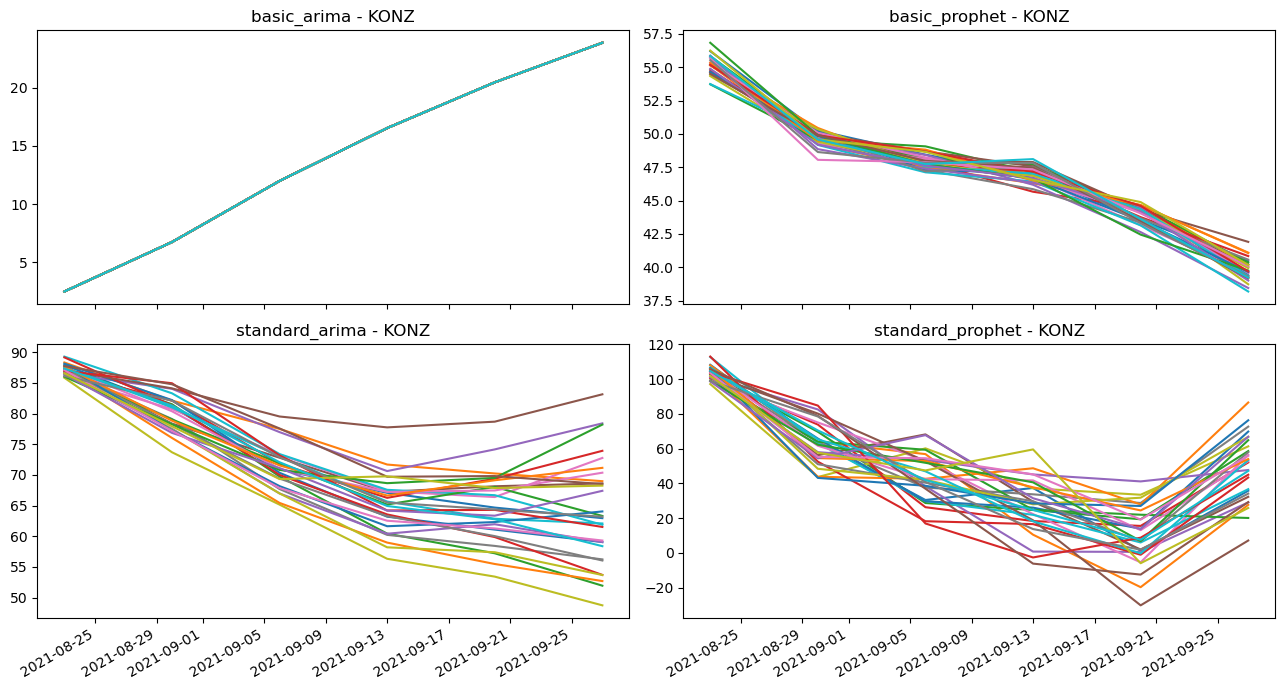

<Figure size 640x480 with 0 Axes>

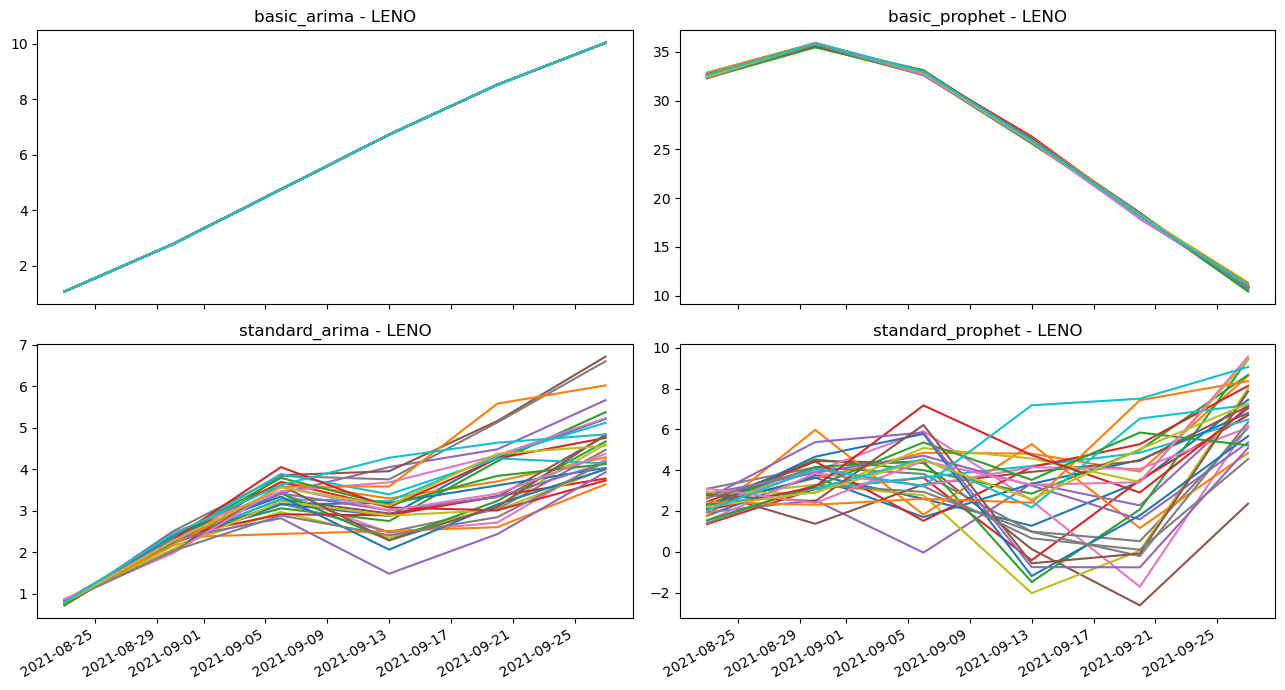

<Figure size 640x480 with 0 Axes>

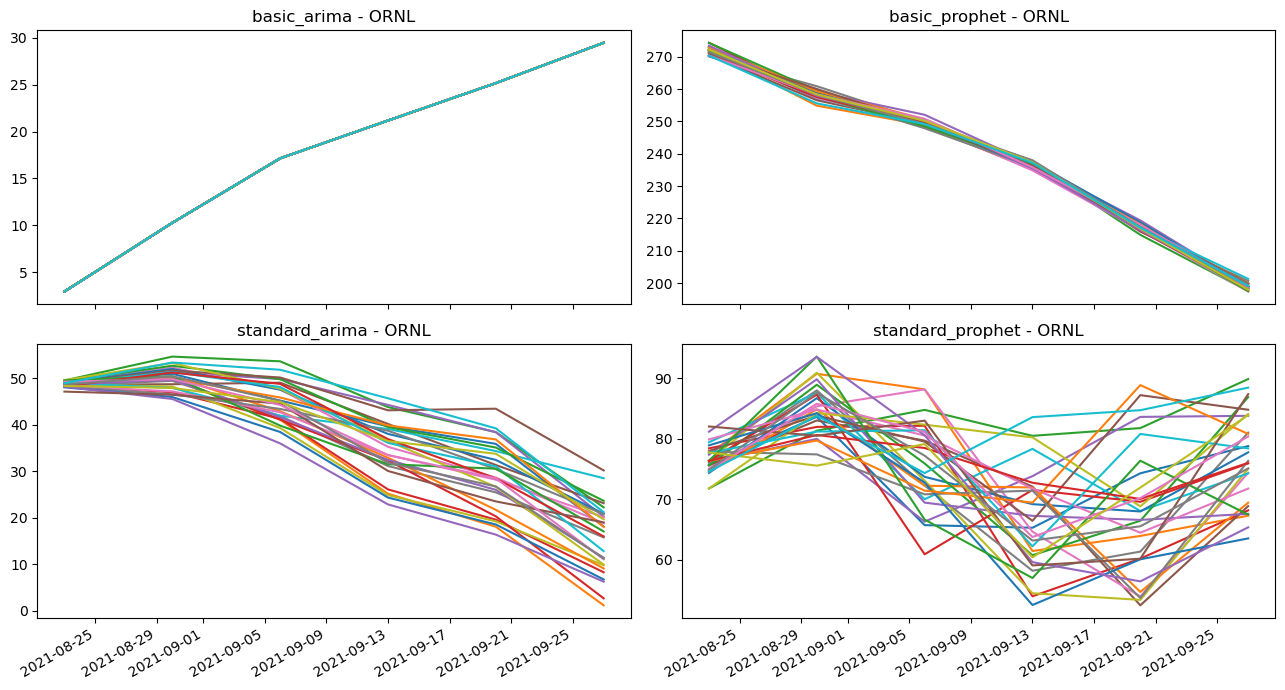

<Figure size 640x480 with 0 Axes>

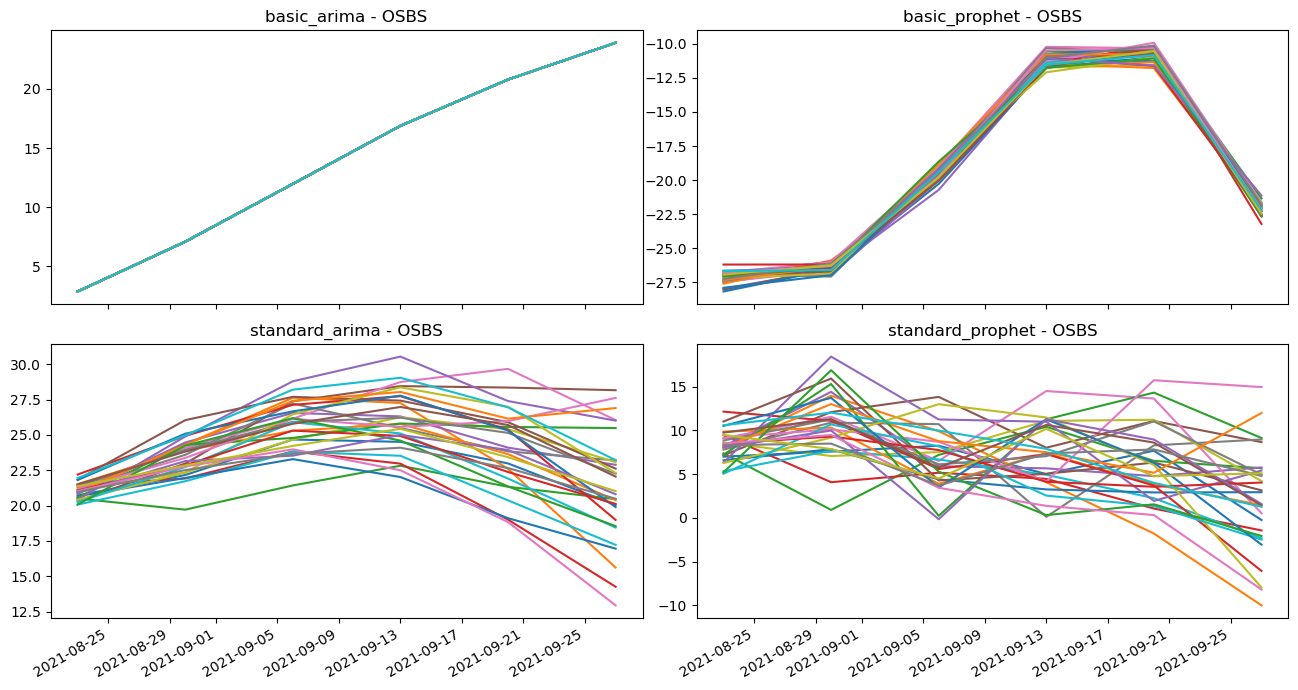

<Figure size 640x480 with 0 Axes>

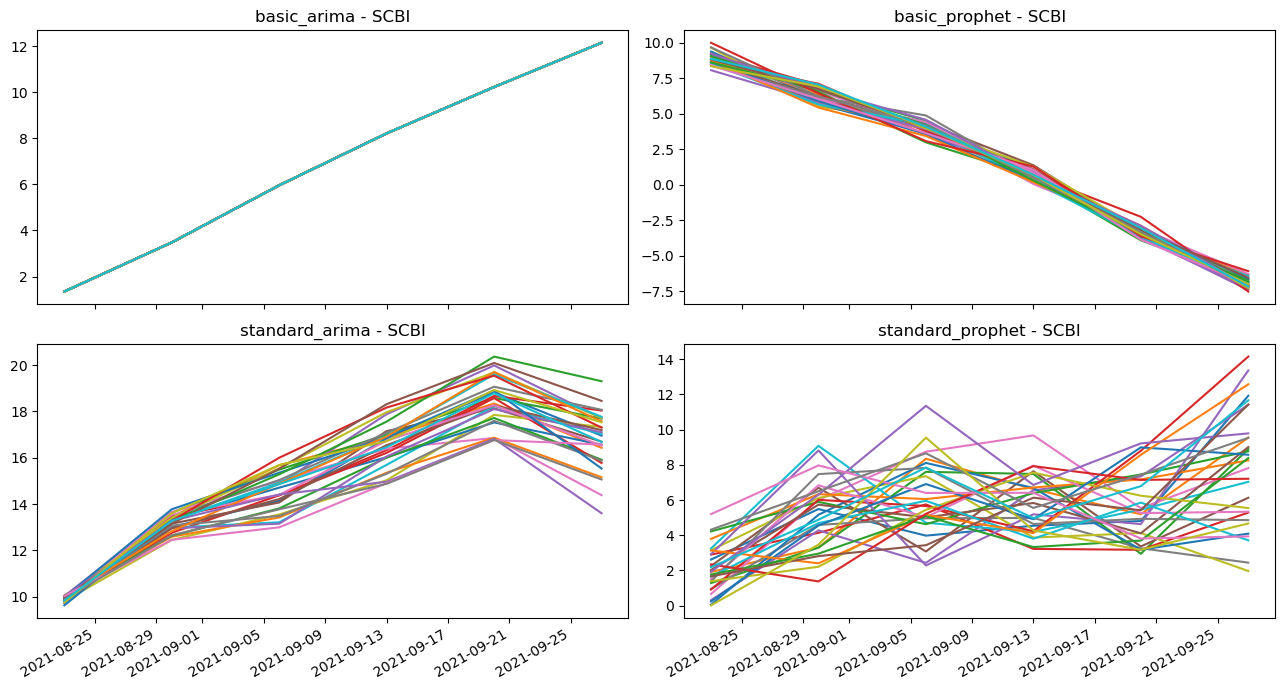

<Figure size 640x480 with 0 Axes>

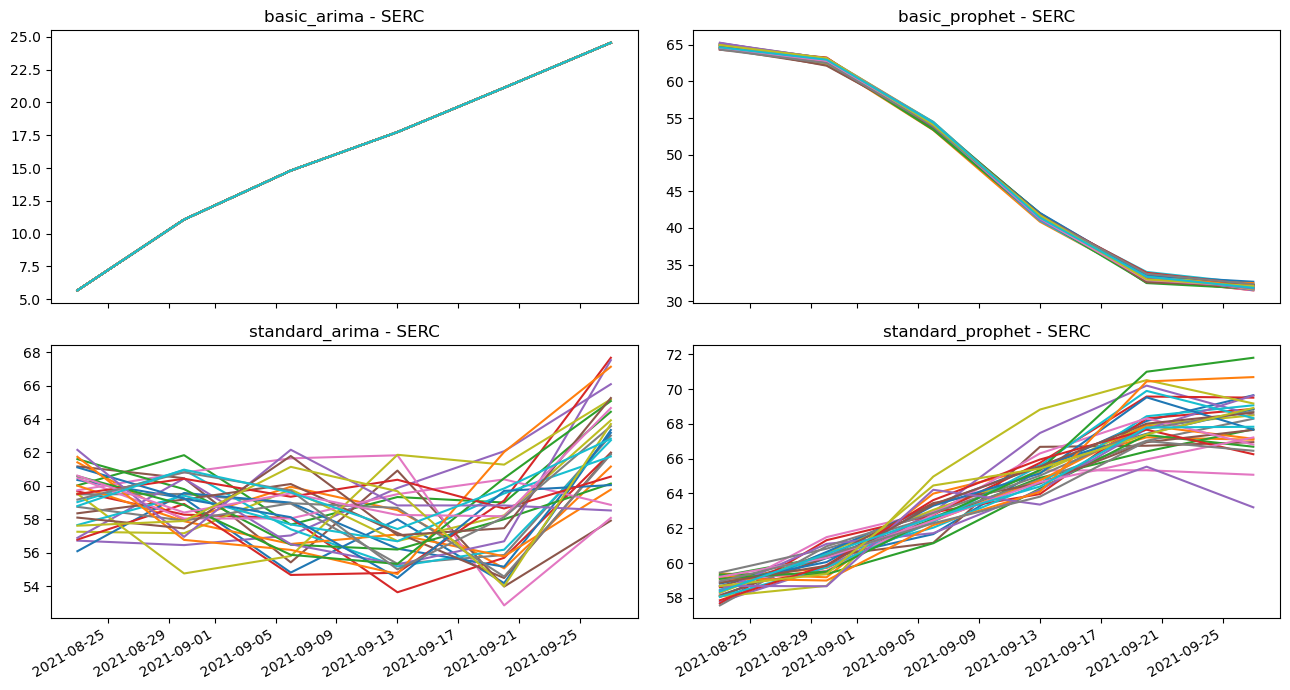

<Figure size 640x480 with 0 Axes>

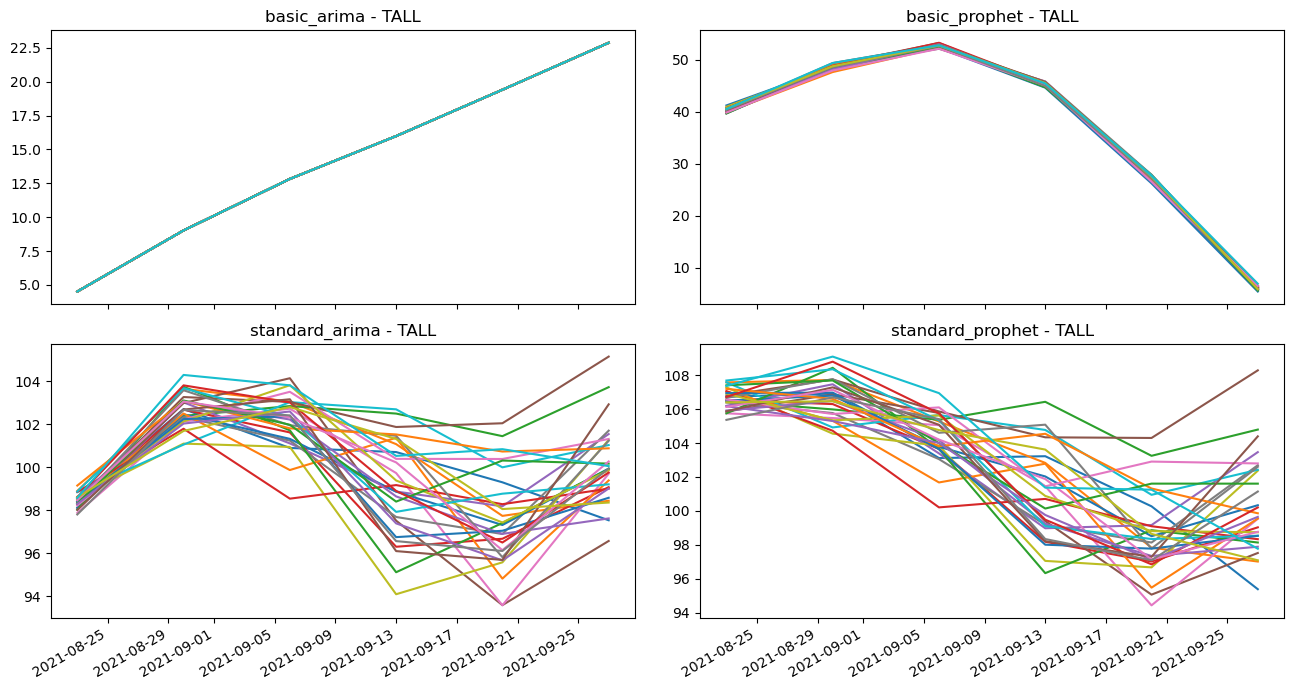

<Figure size 640x480 with 0 Axes>

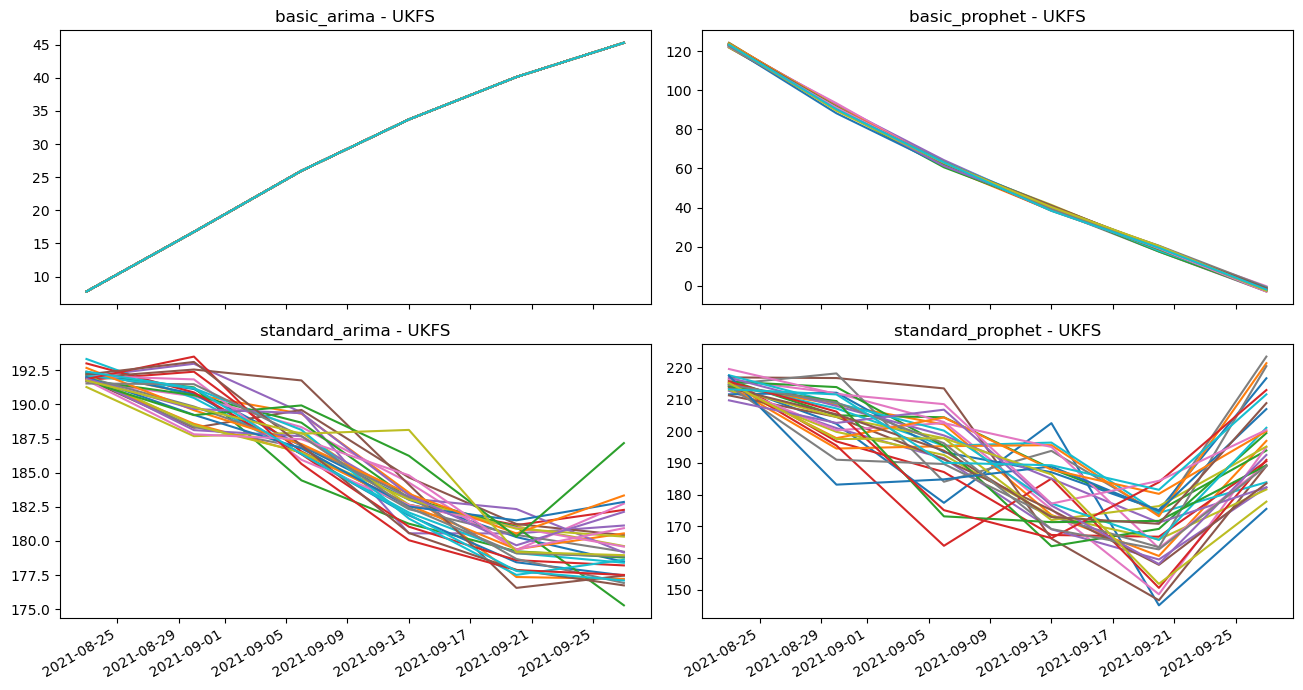

<Figure size 640x480 with 0 Axes>

In [7]:
for i in np.arange(0, len(draft_forecast.index.get_level_values(0).unique()), 1):
    fig = plt.figure(figsize = (13,7))
    siselect = draft_forecast.index.get_level_values(0).unique()[i]
    l = 0
    for mtype in draft_forecast.index.get_level_values(1).unique():
        l = l + 1
        plt.subplot(2,2,l)
        dclipped = draft_forecast[['.mean']][(draft_forecast.index.get_level_values(0) == siselect)
                                                      & (draft_forecast.index.get_level_values(1) == mtype)]
        for j in np.arange(1, 31, 1):

            plt.plot(pd.DataFrame(dclipped[dclipped.index.get_level_values(3) == j]['.mean'].values,
                    index = dclipped[dclipped.index.get_level_values(3) == j]['.mean'].index.get_level_values(2),
                    columns = ['.mean']))

        plt.title(mtype + ' - ' + siselect)
        fig.autofmt_xdate()

    plt.tight_layout()
    plt.show()
    plt.savefig('forecast_figs/forecasts_' + siselect +'.png')



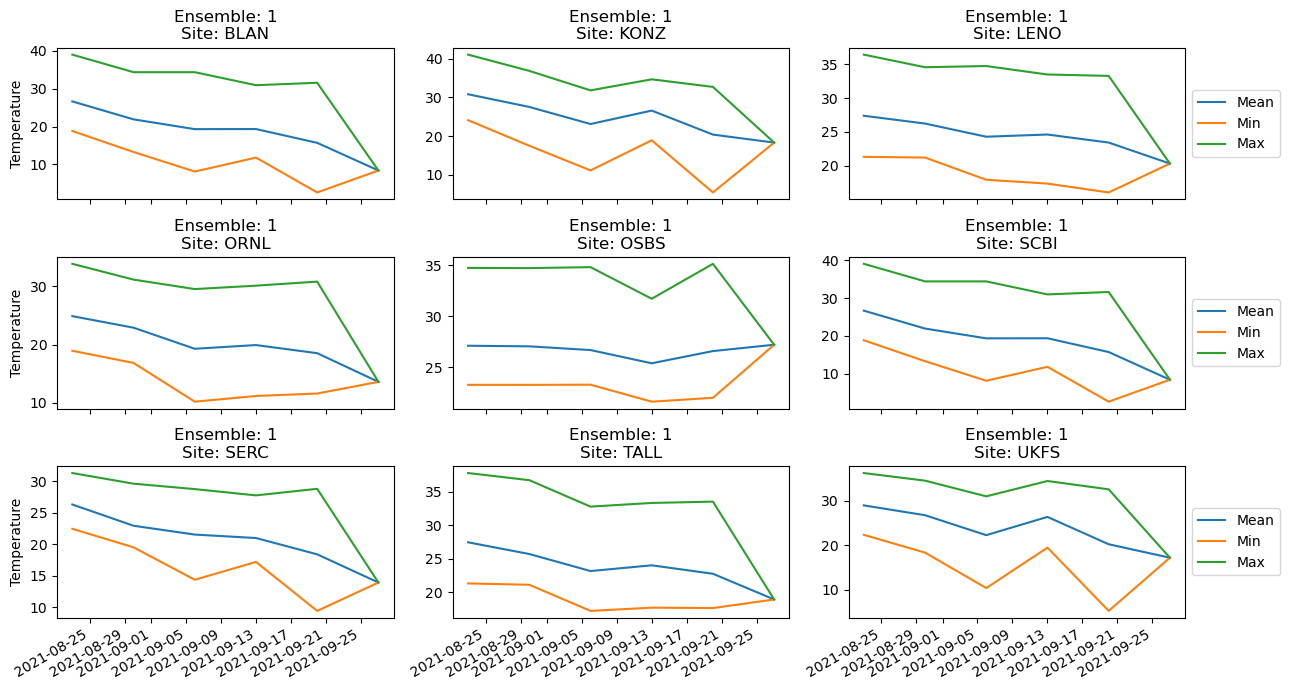

<Figure size 640x480 with 0 Axes>

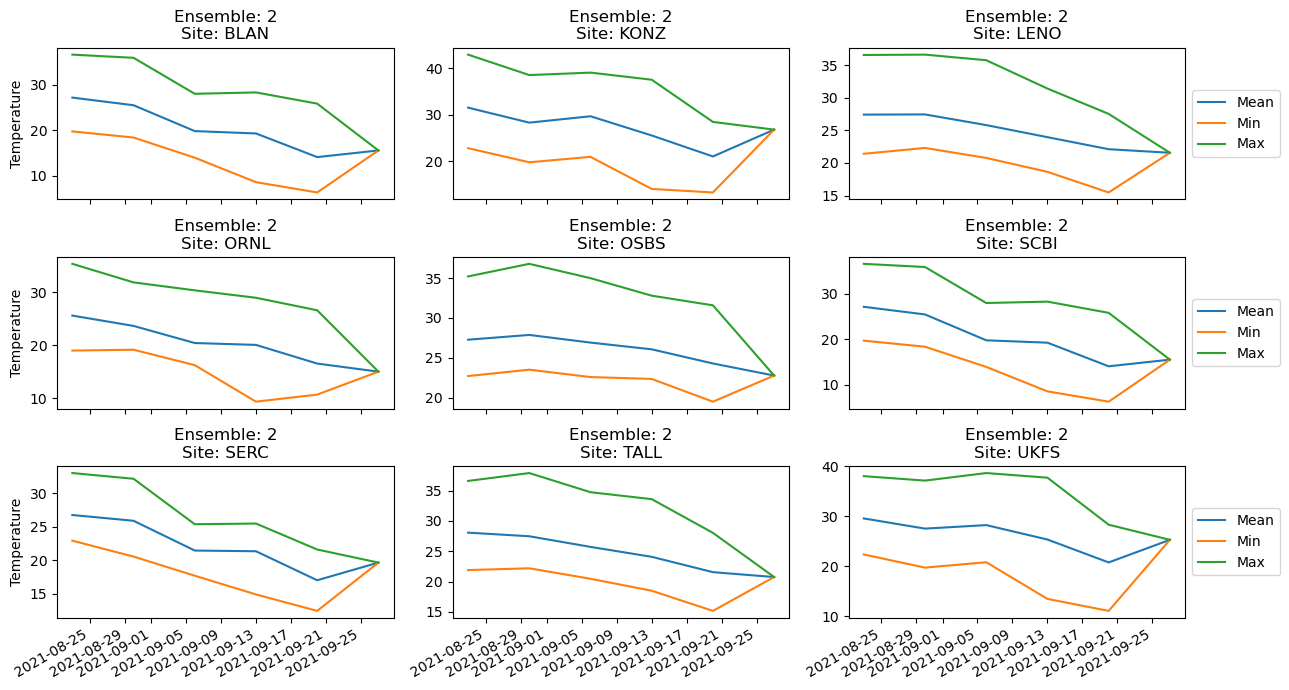

<Figure size 640x480 with 0 Axes>

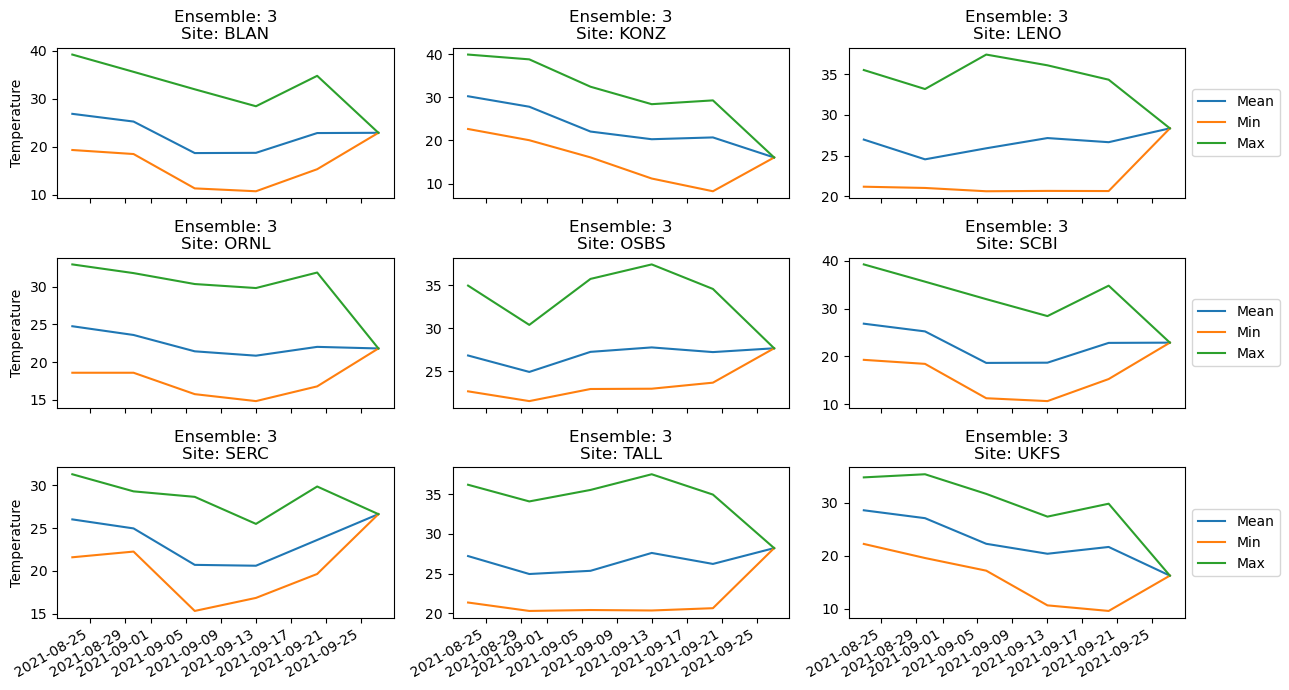

<Figure size 640x480 with 0 Axes>

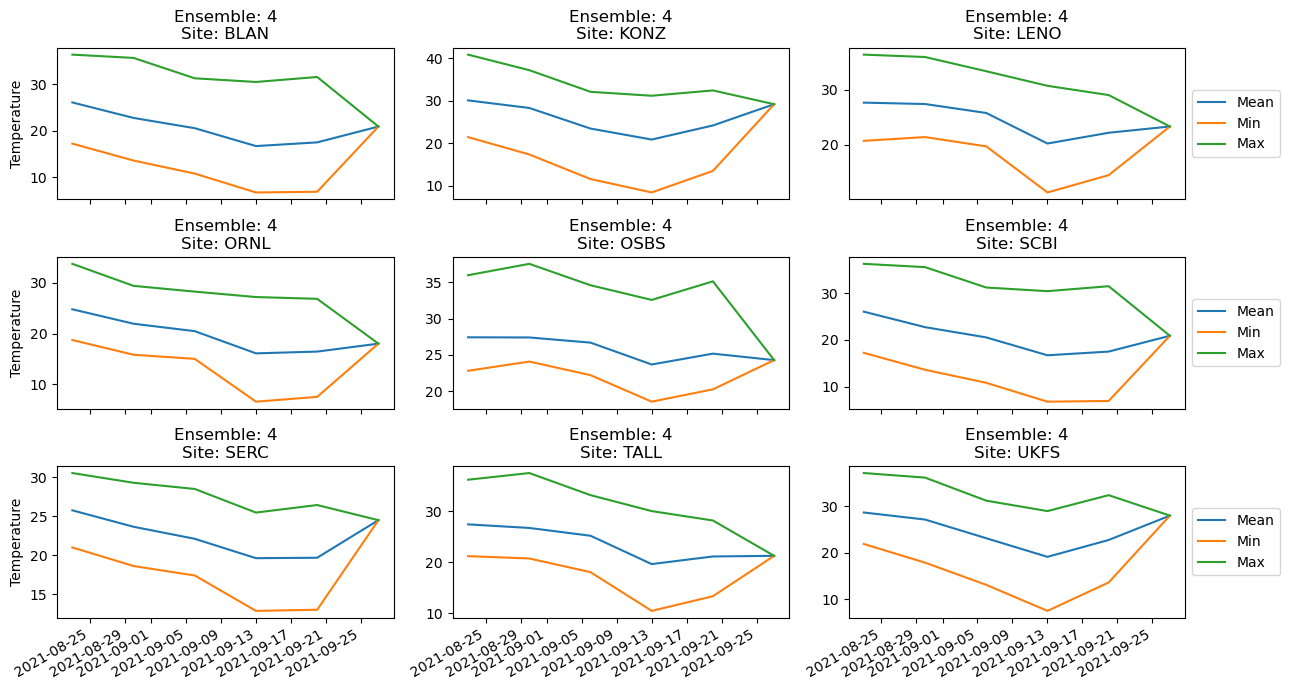

<Figure size 640x480 with 0 Axes>

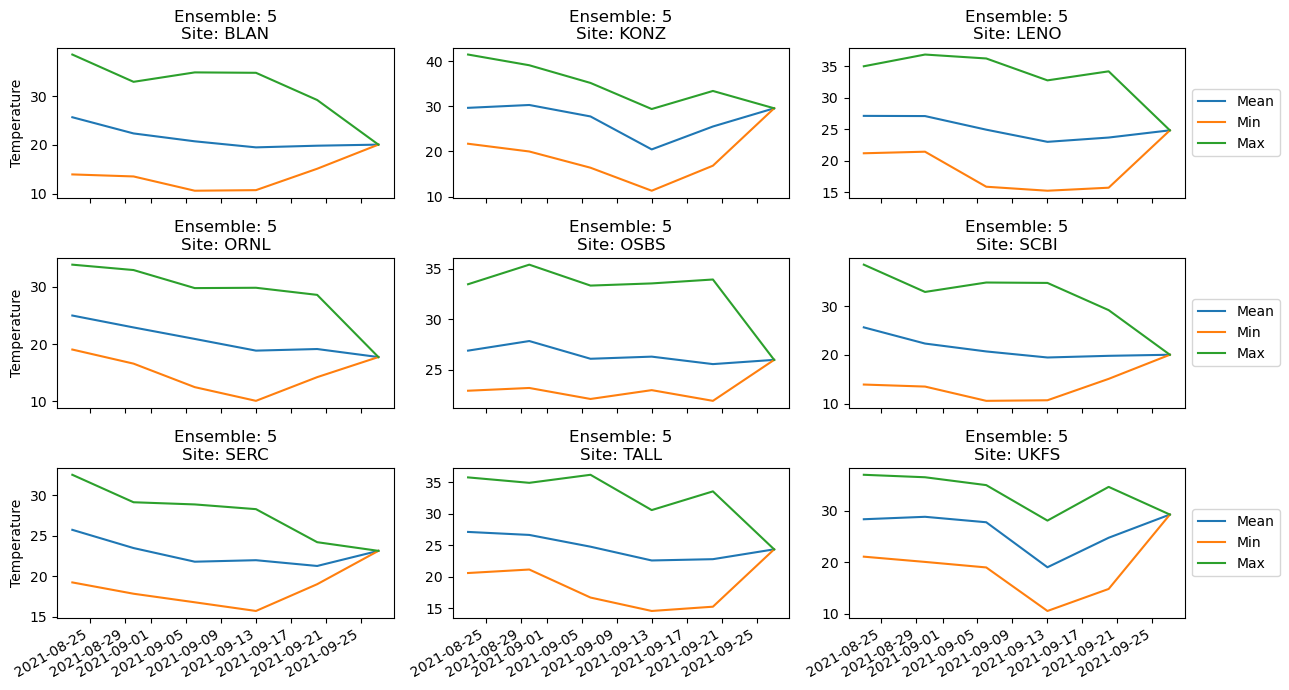

<Figure size 640x480 with 0 Axes>

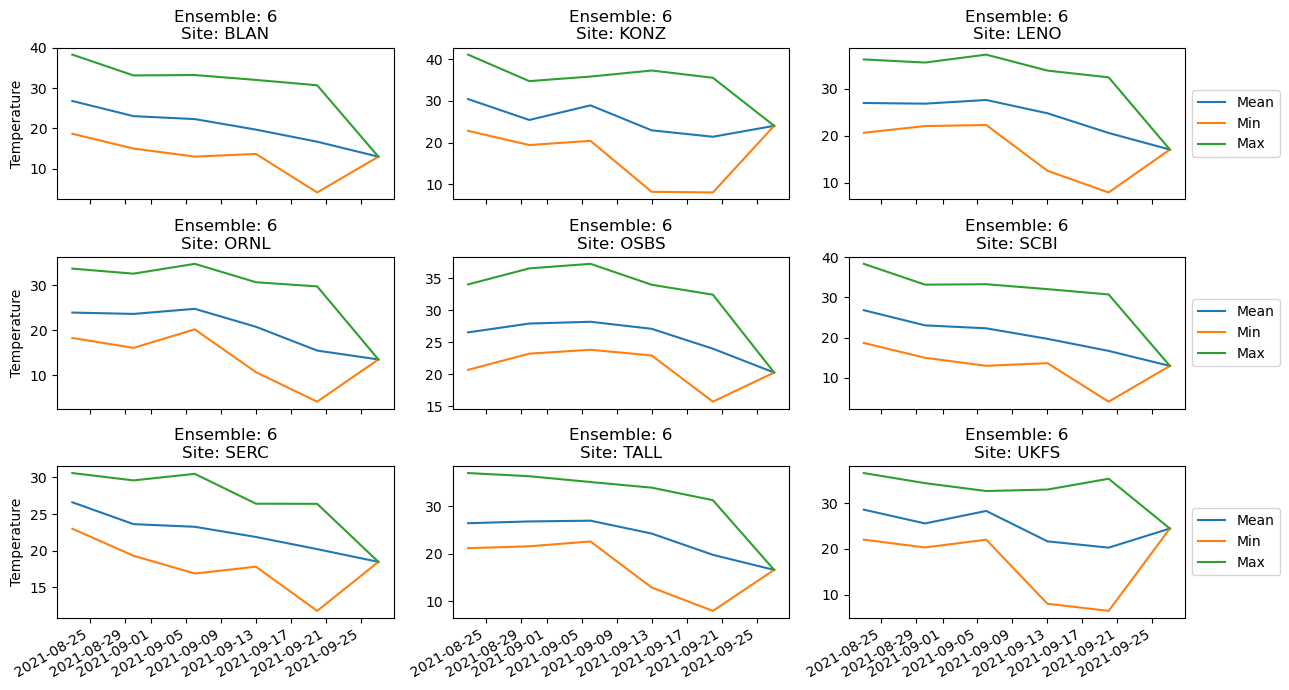

<Figure size 640x480 with 0 Axes>

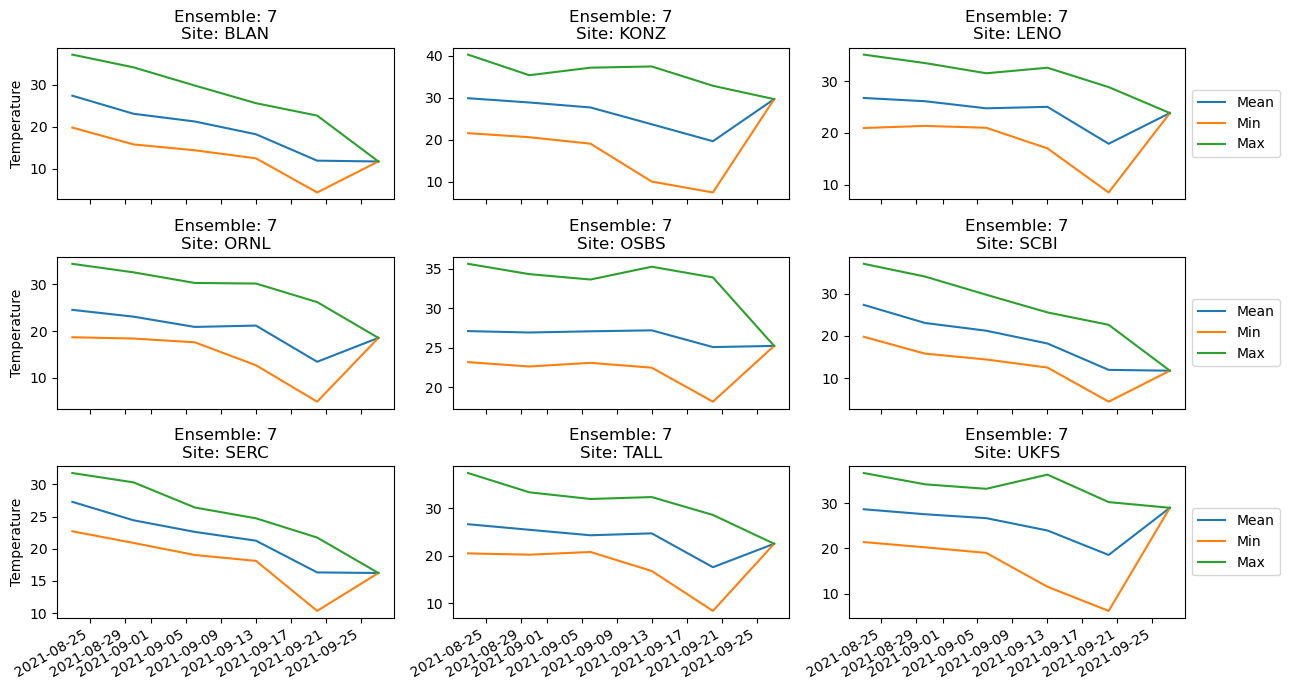

<Figure size 640x480 with 0 Axes>

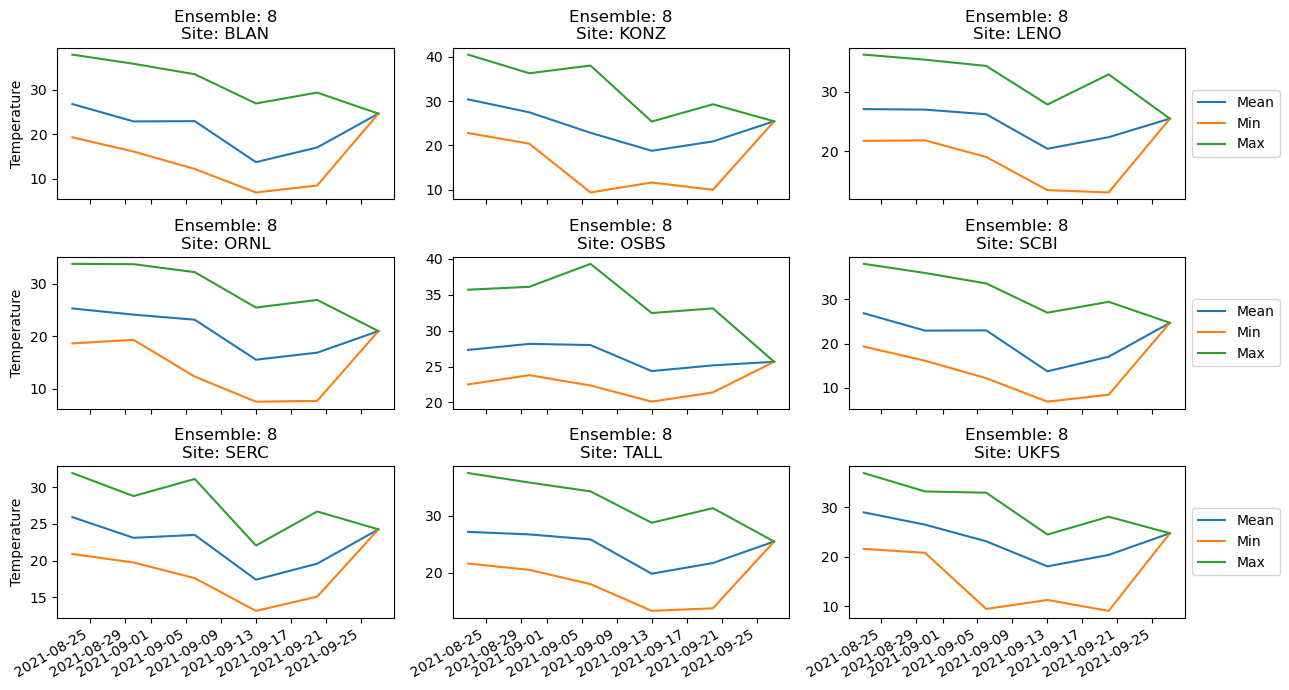

<Figure size 640x480 with 0 Axes>

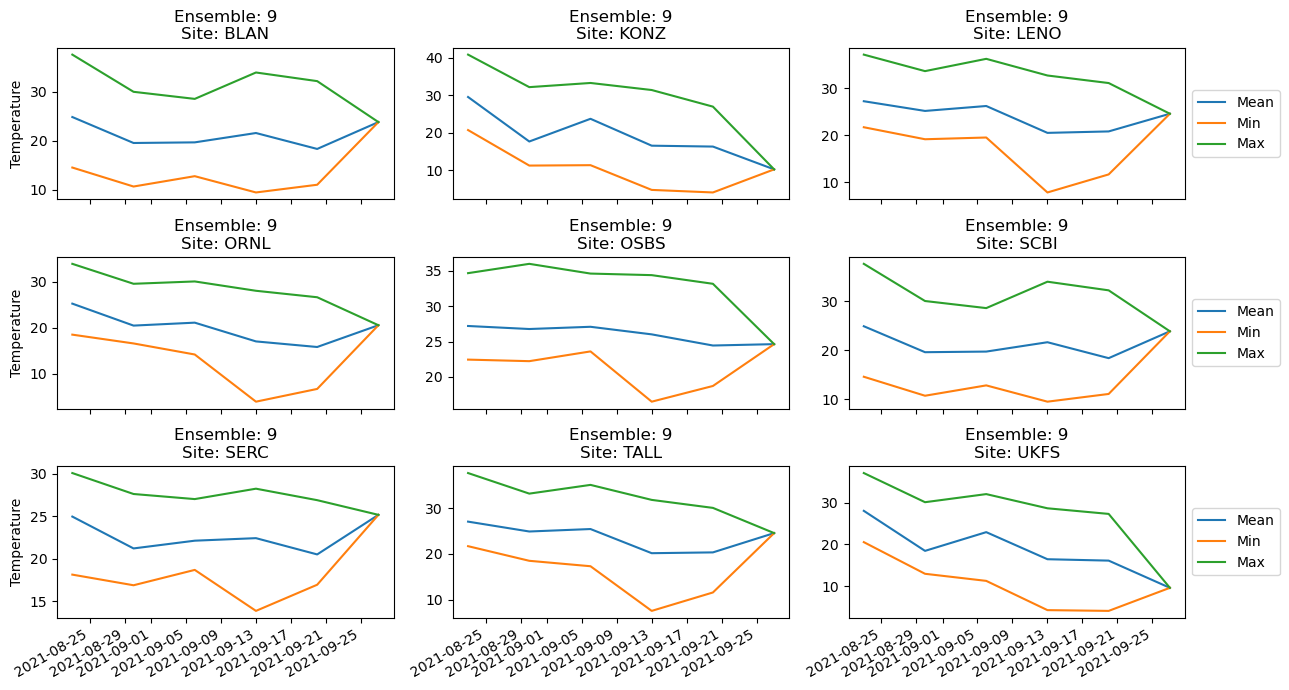

<Figure size 640x480 with 0 Axes>

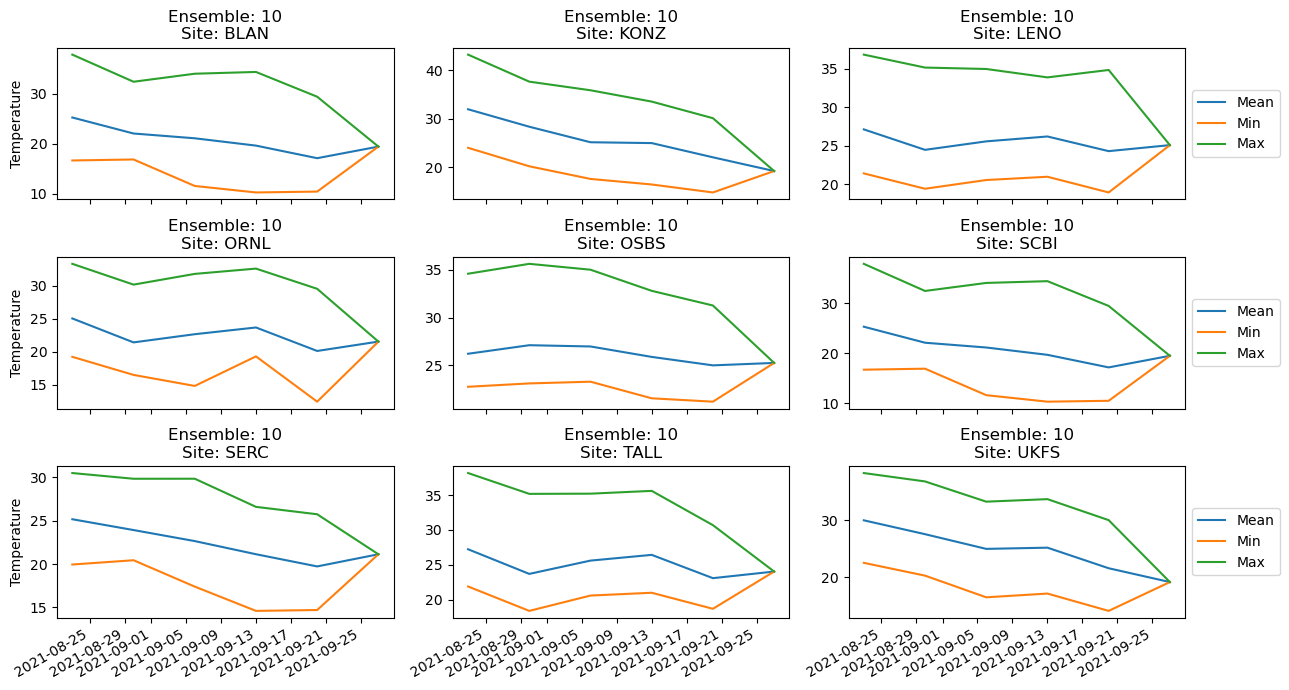

<Figure size 640x480 with 0 Axes>

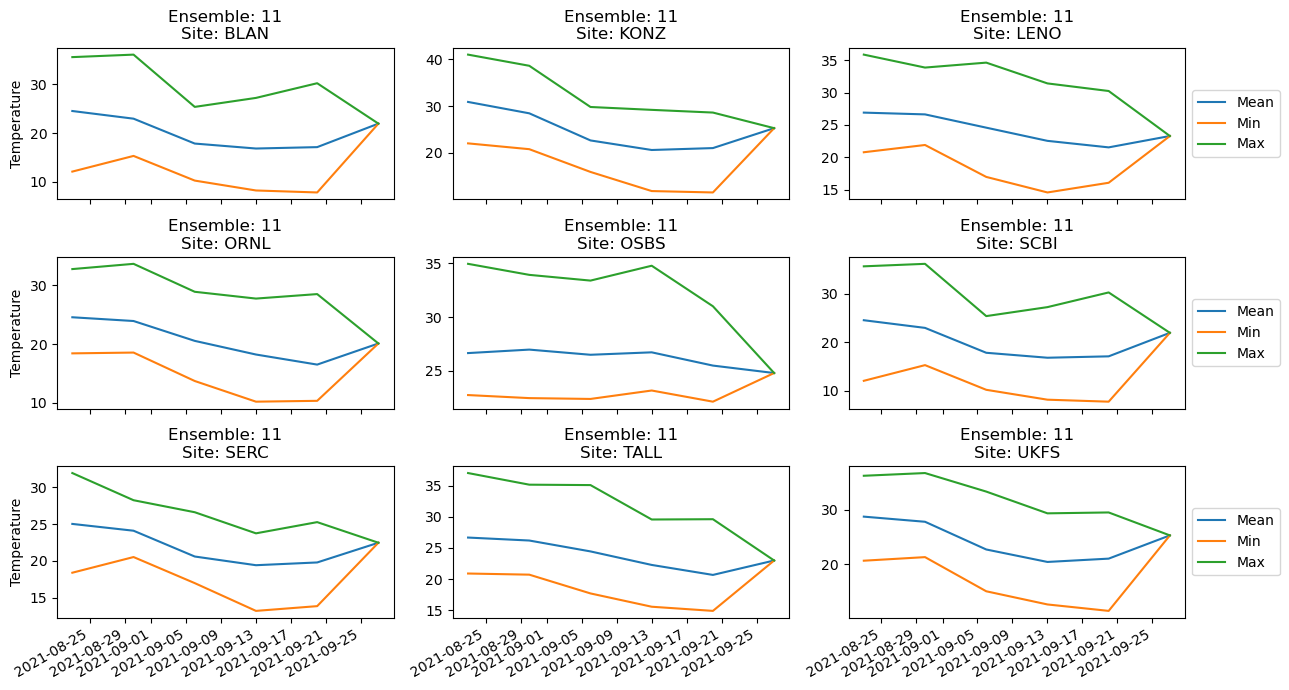

<Figure size 640x480 with 0 Axes>

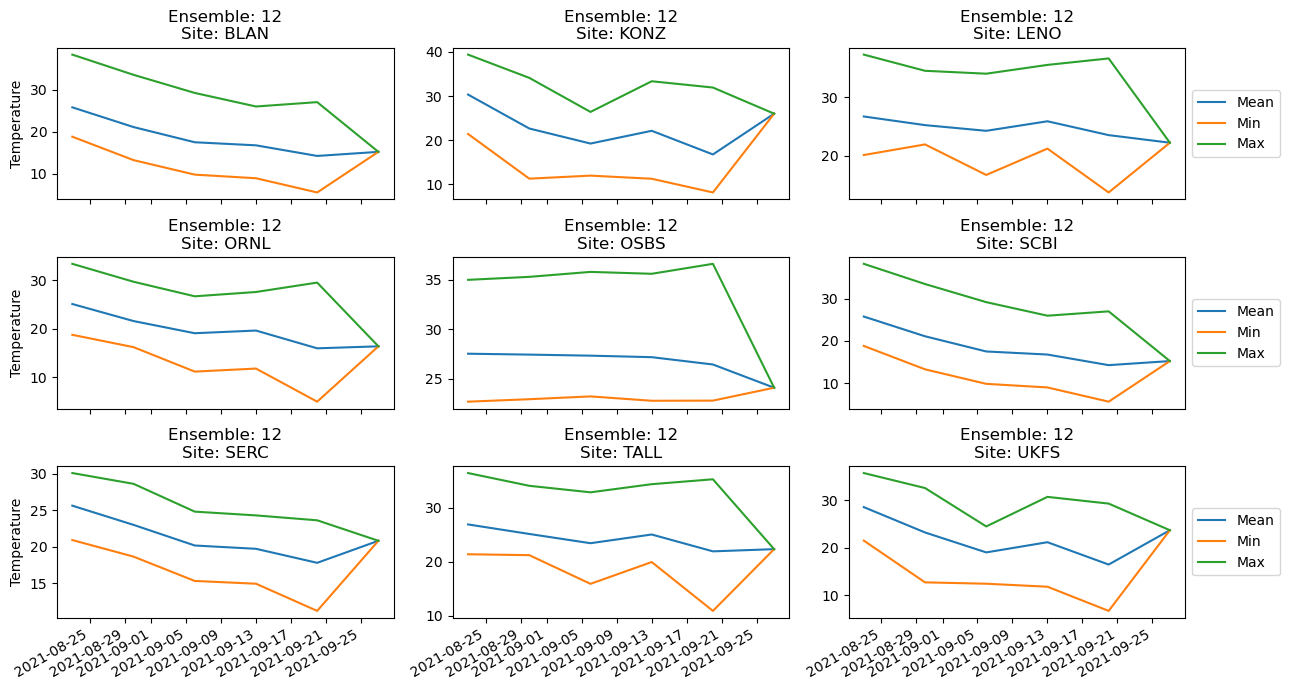

<Figure size 640x480 with 0 Axes>

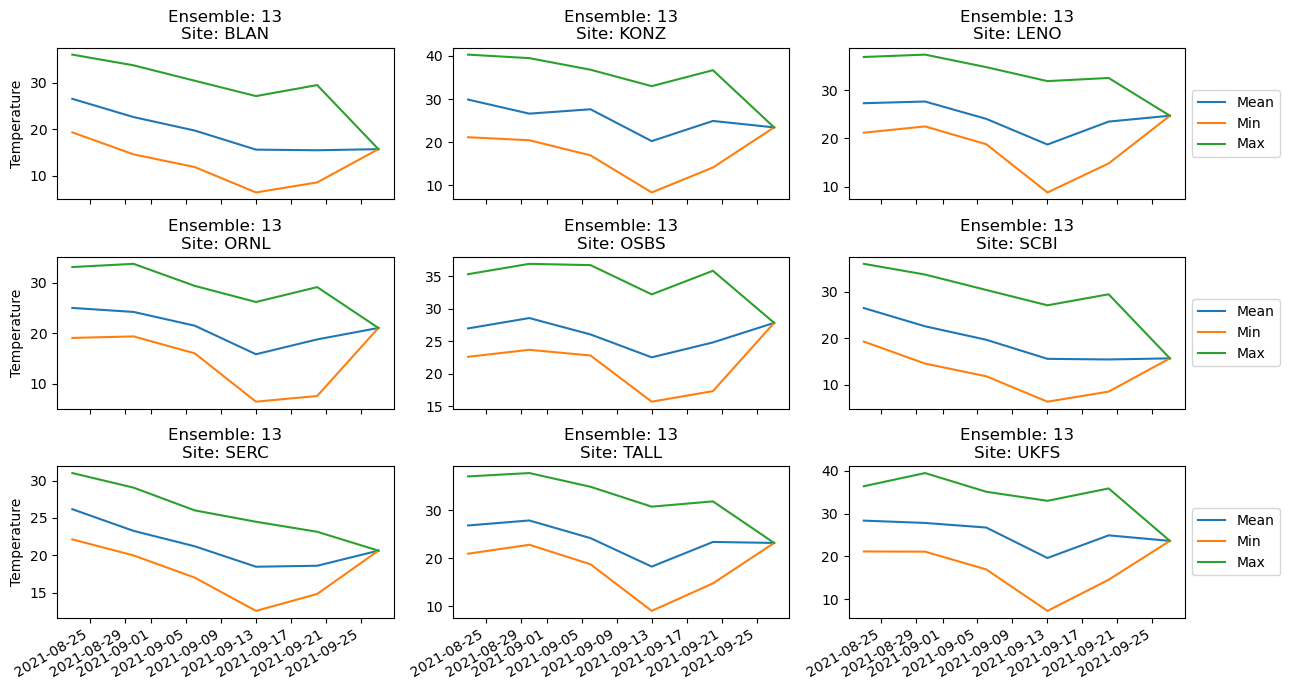

<Figure size 640x480 with 0 Axes>

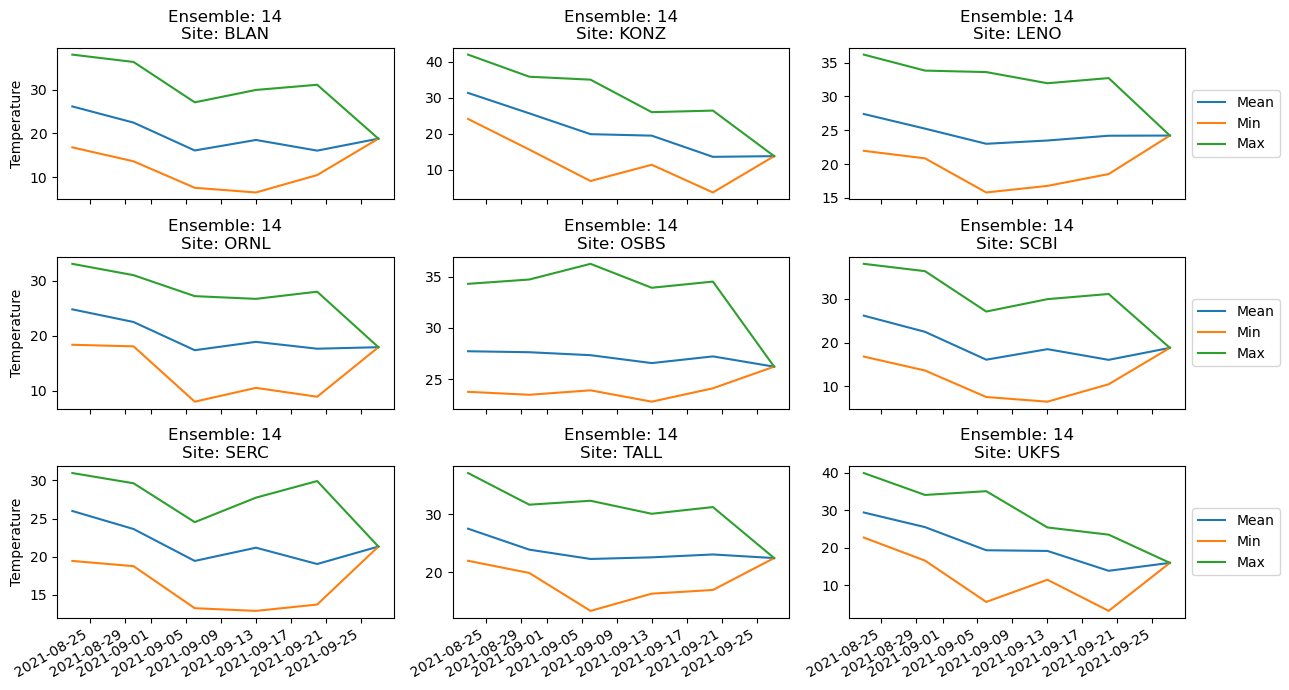

<Figure size 640x480 with 0 Axes>

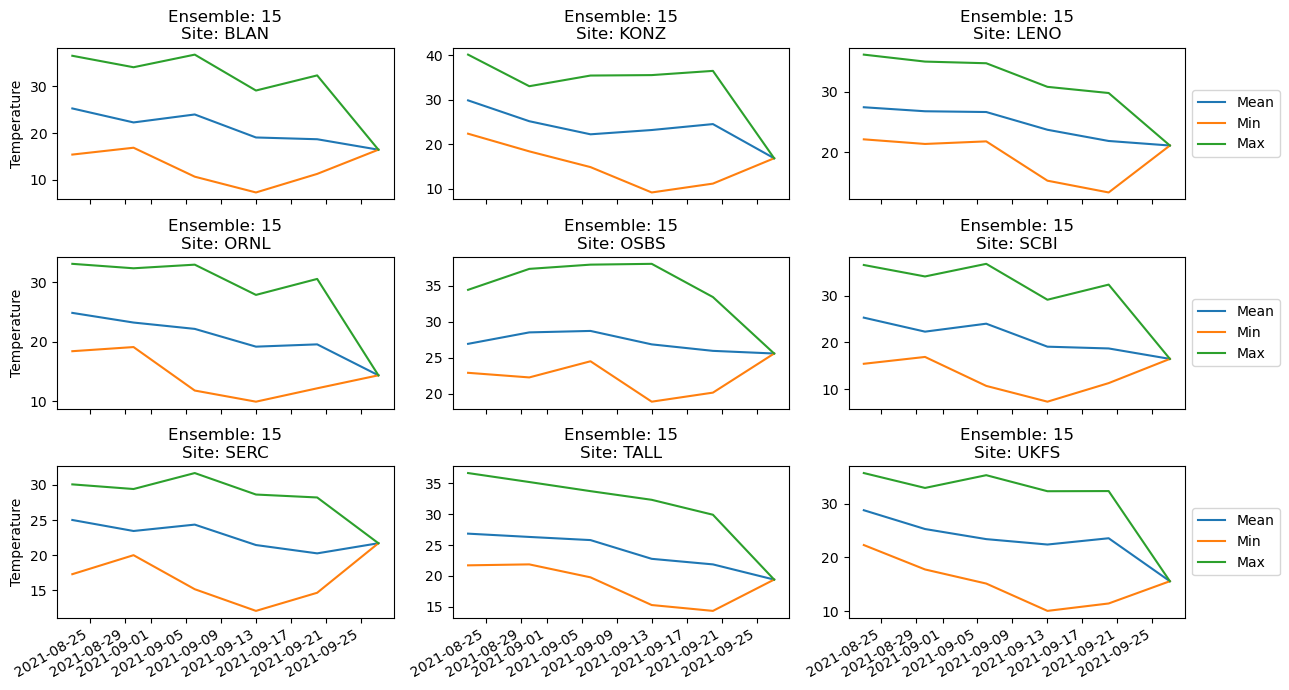

<Figure size 640x480 with 0 Axes>

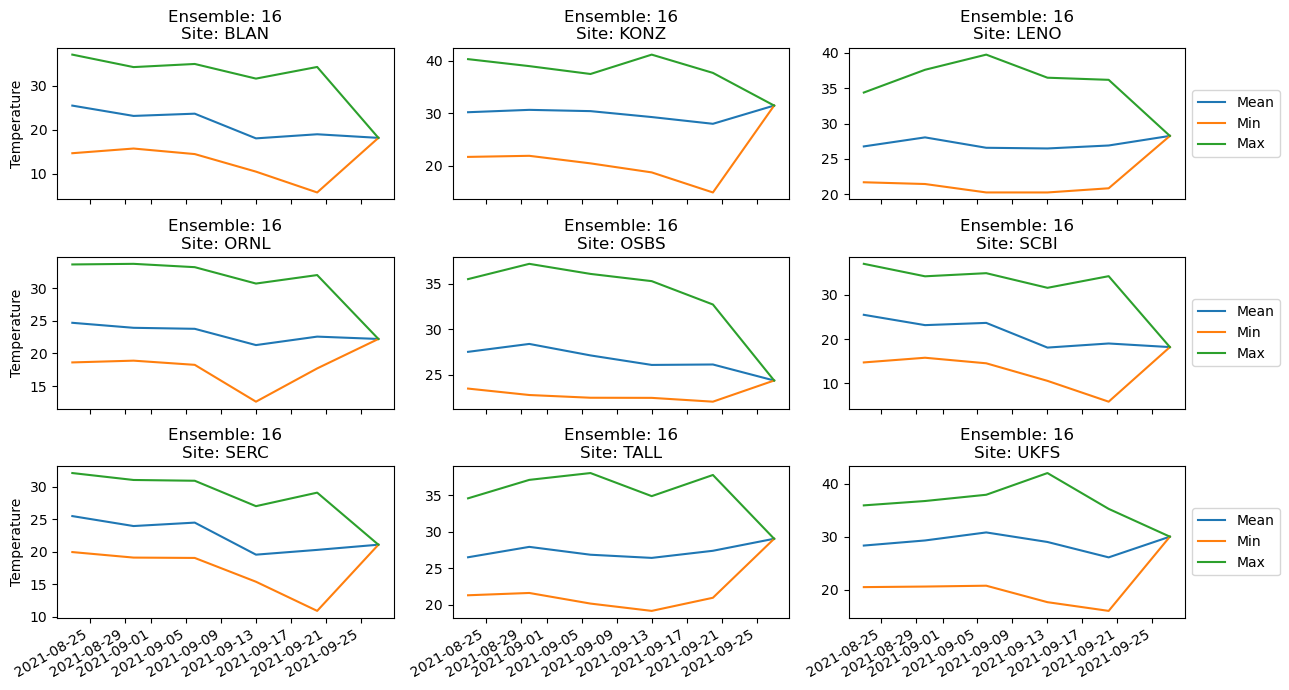

<Figure size 640x480 with 0 Axes>

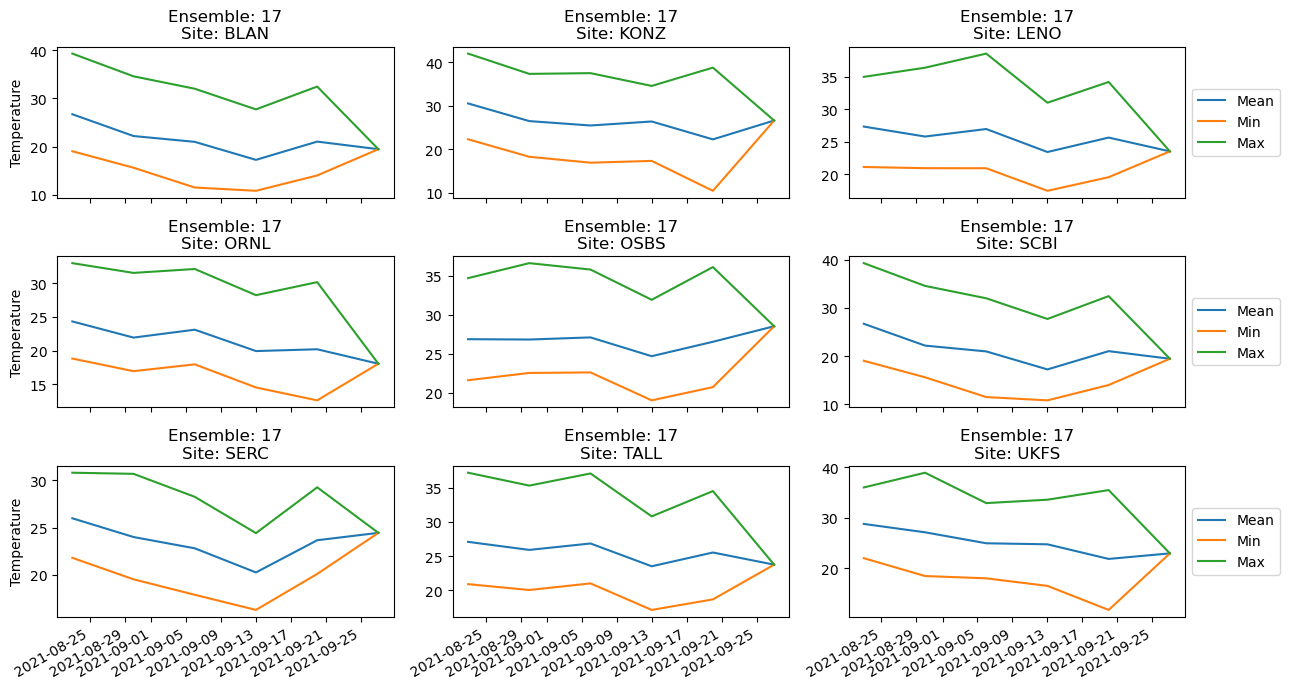

<Figure size 640x480 with 0 Axes>

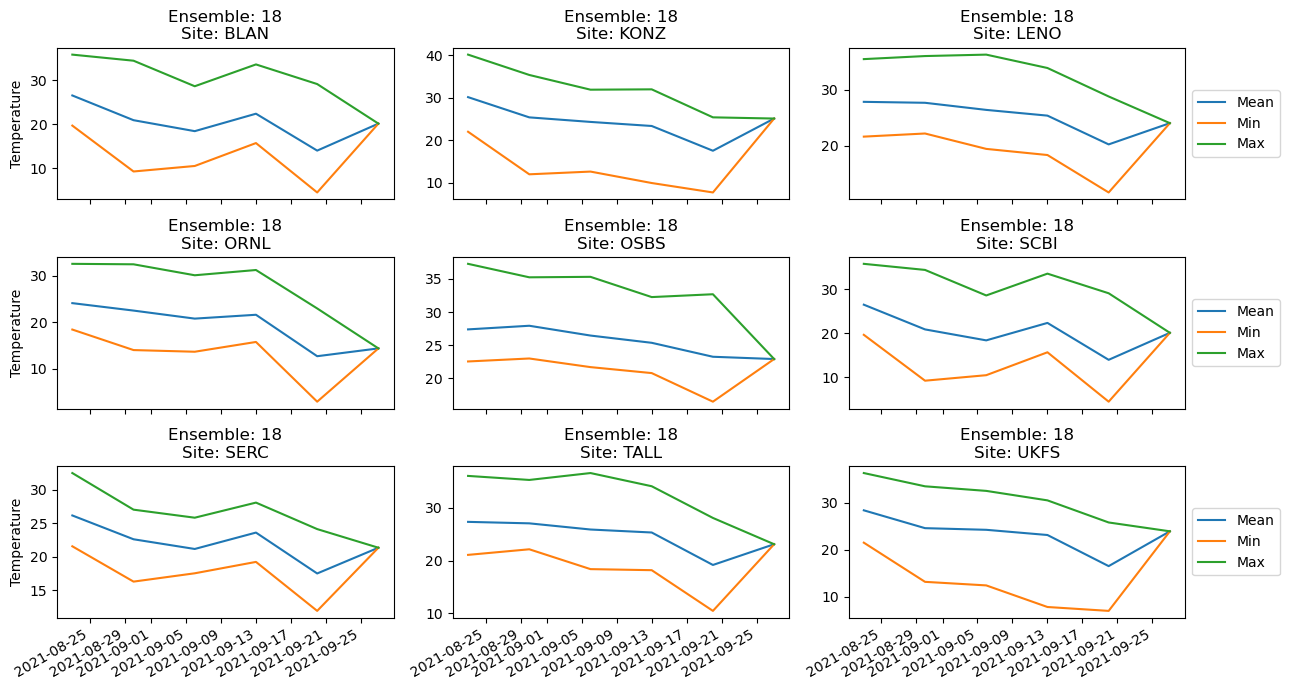

<Figure size 640x480 with 0 Axes>

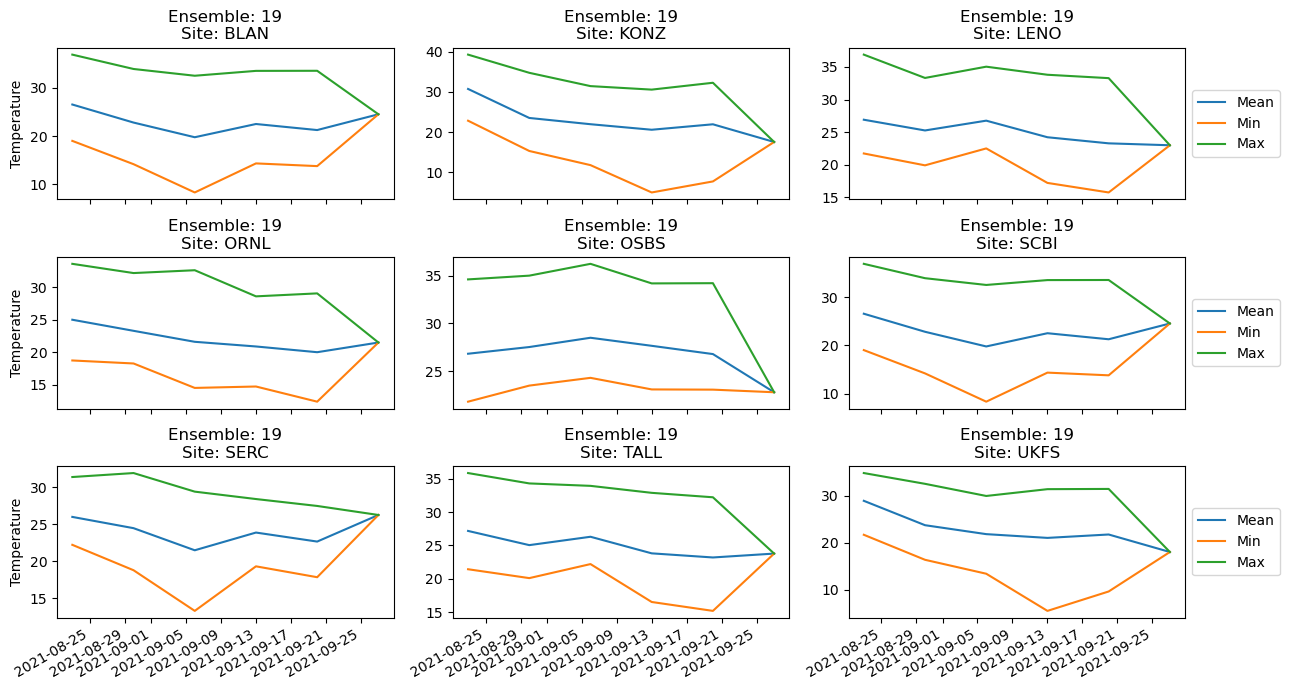

<Figure size 640x480 with 0 Axes>

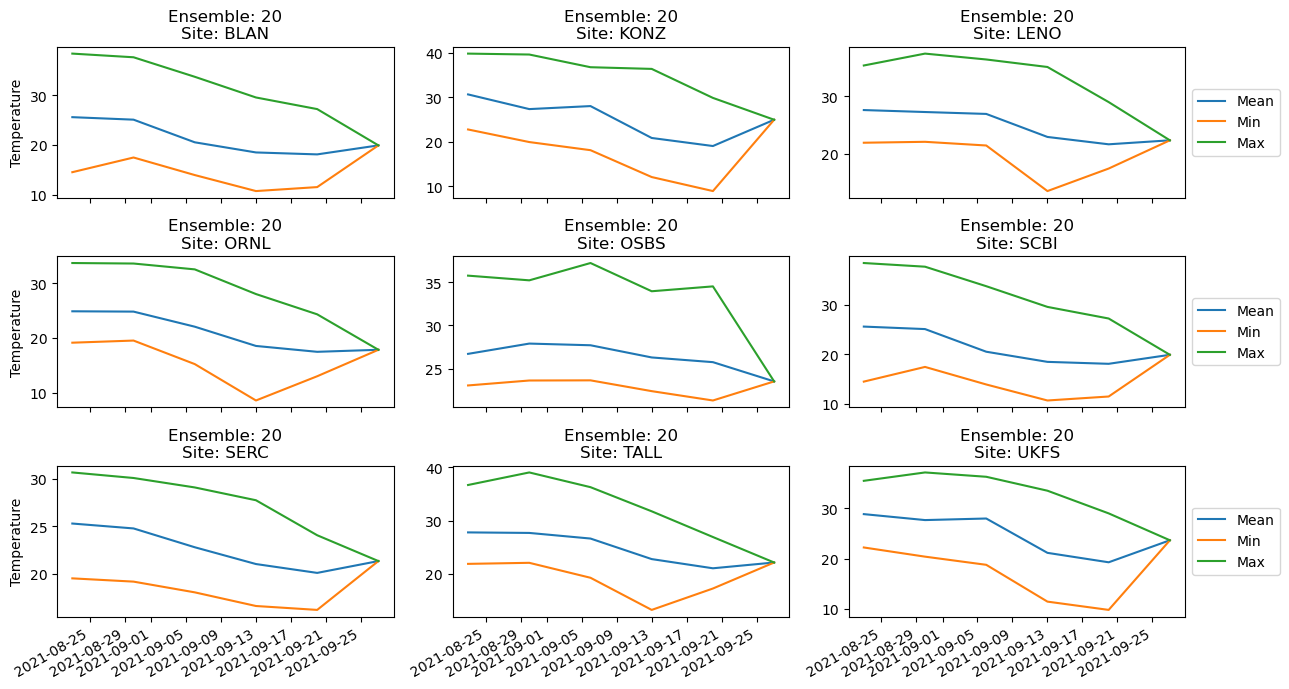

<Figure size 640x480 with 0 Axes>

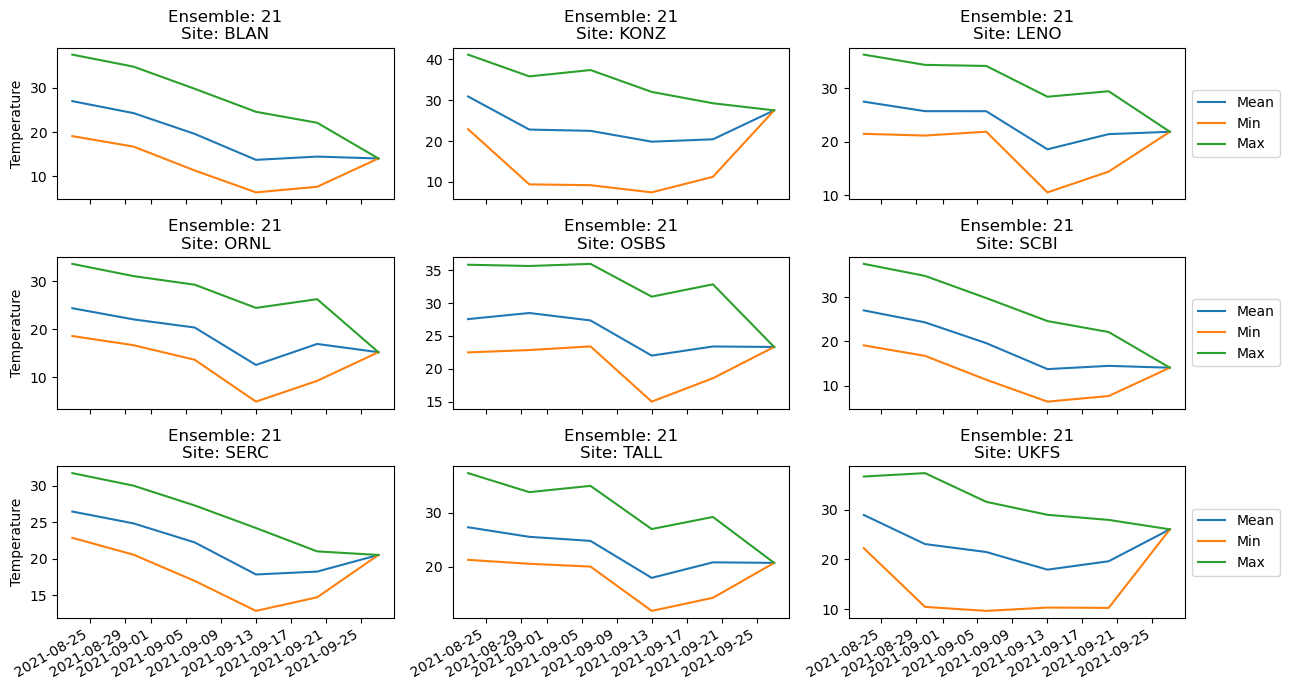

<Figure size 640x480 with 0 Axes>

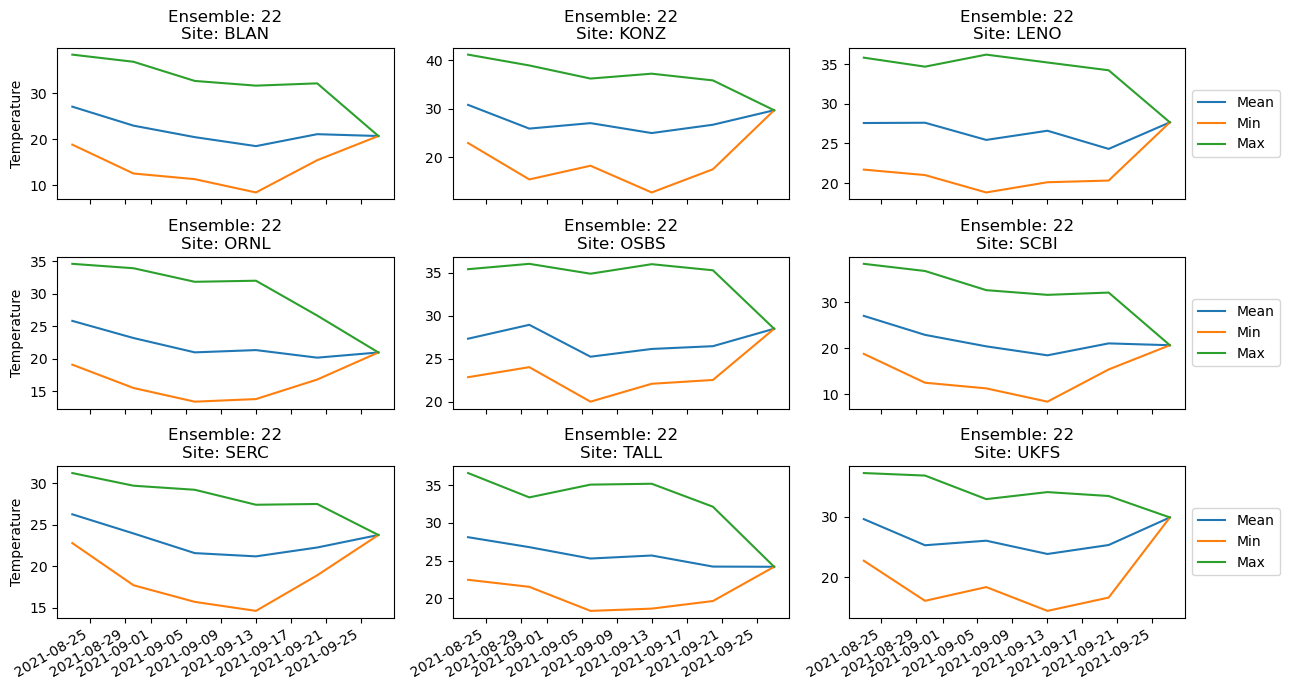

<Figure size 640x480 with 0 Axes>

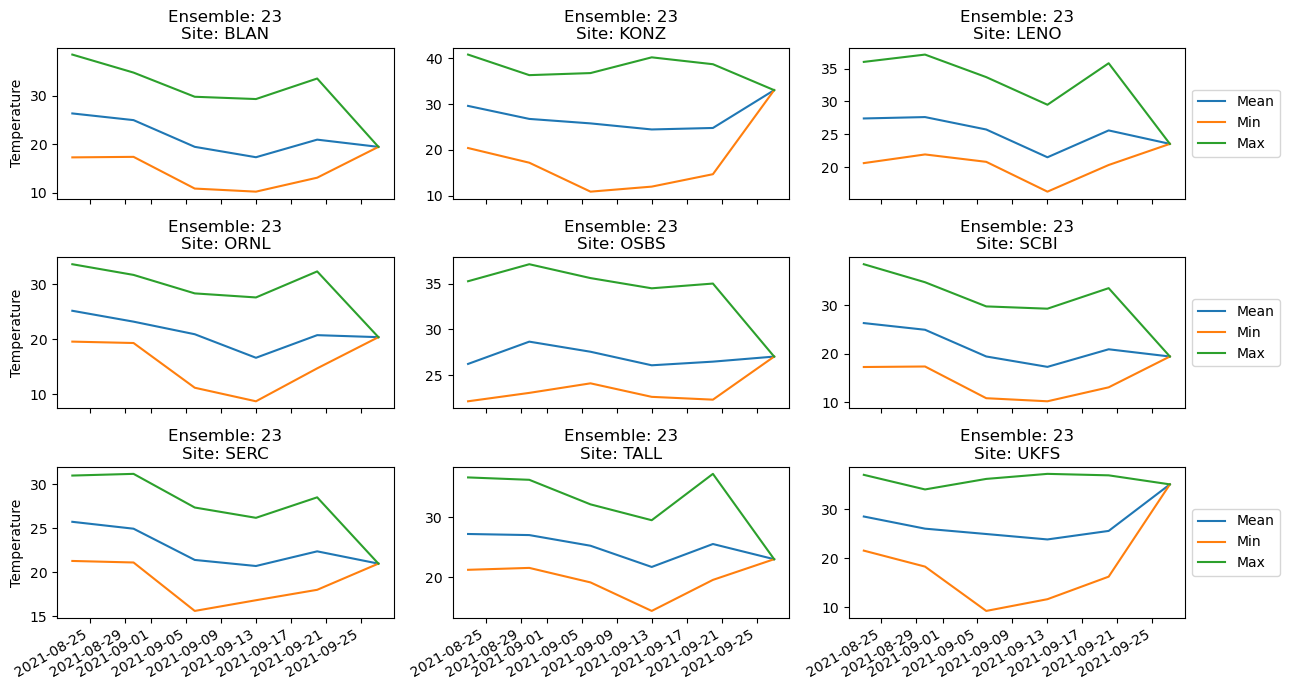

<Figure size 640x480 with 0 Axes>

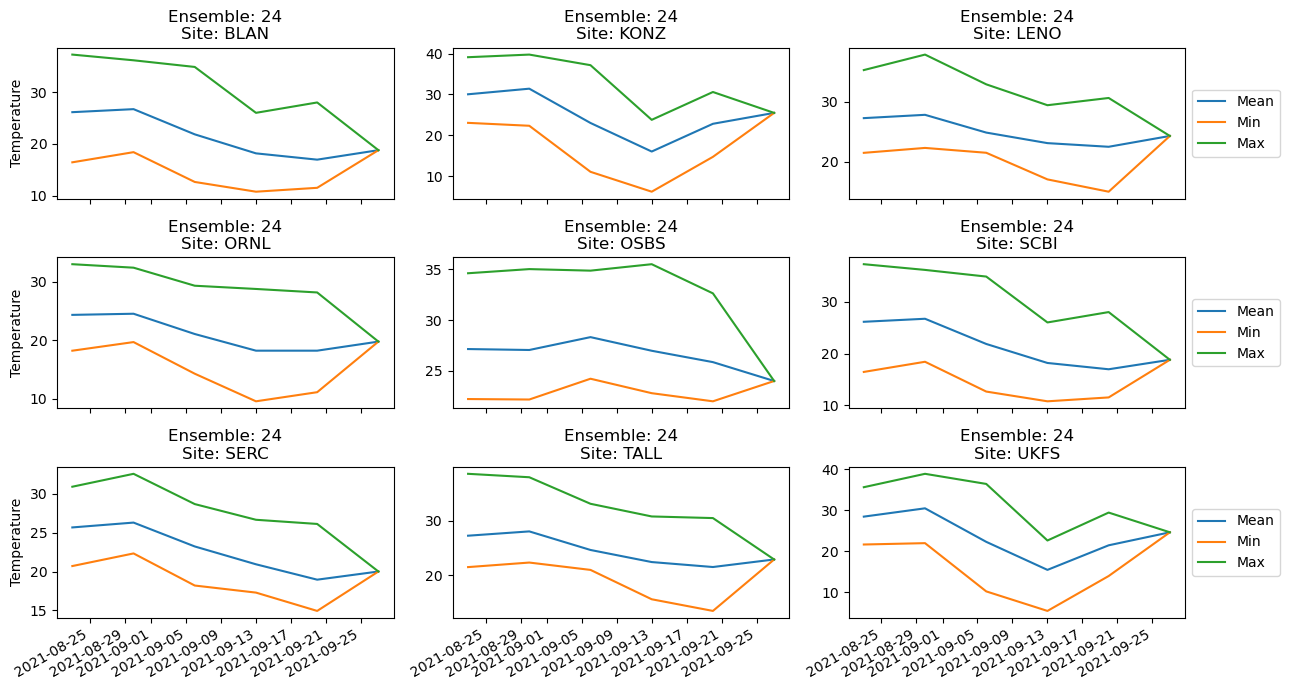

<Figure size 640x480 with 0 Axes>

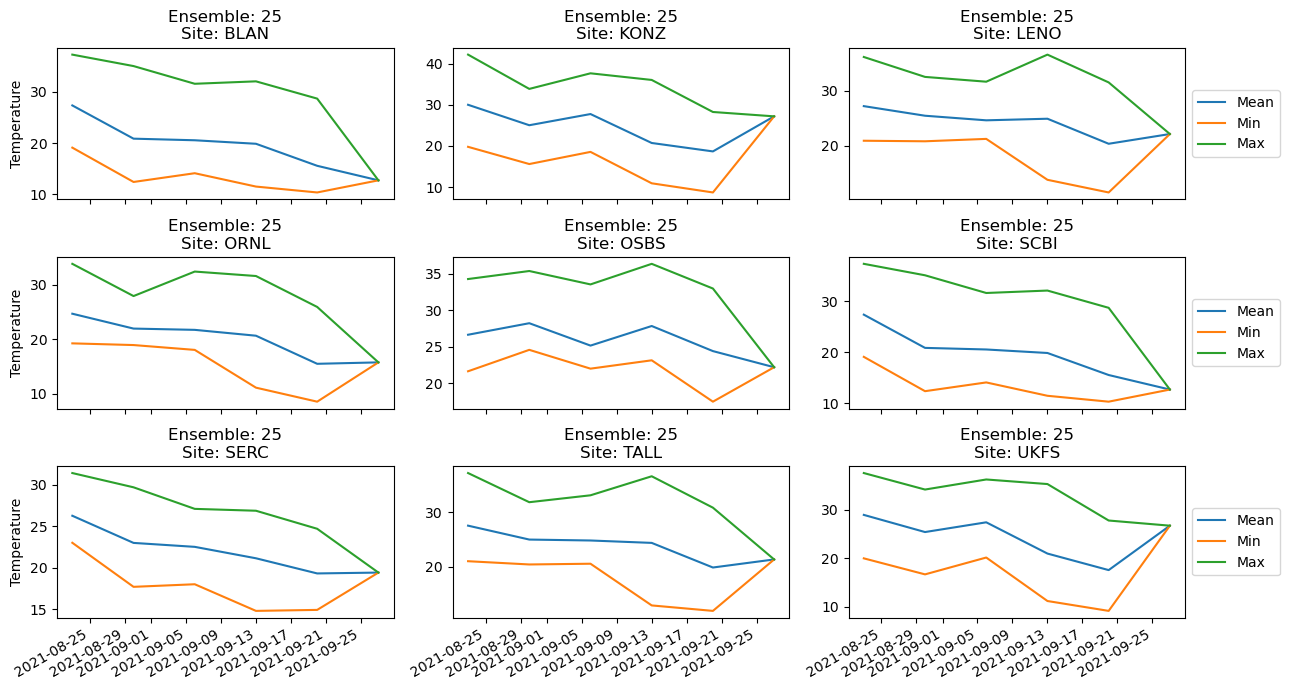

<Figure size 640x480 with 0 Axes>

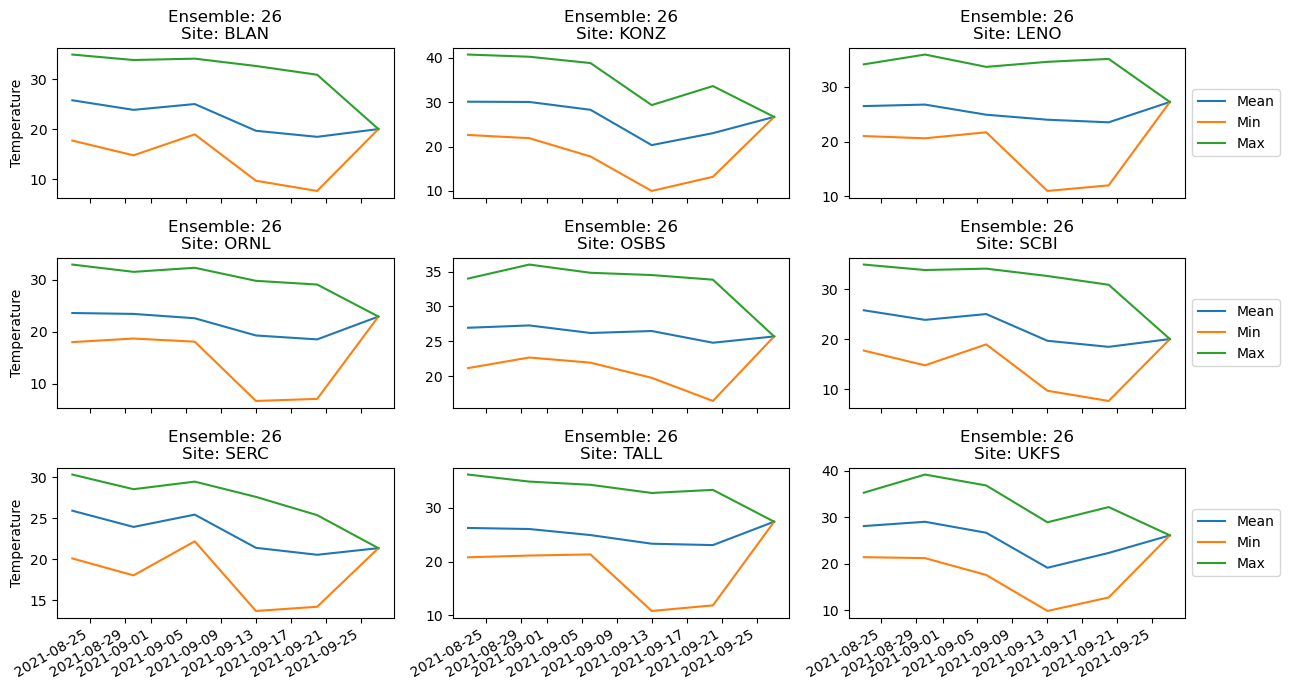

<Figure size 640x480 with 0 Axes>

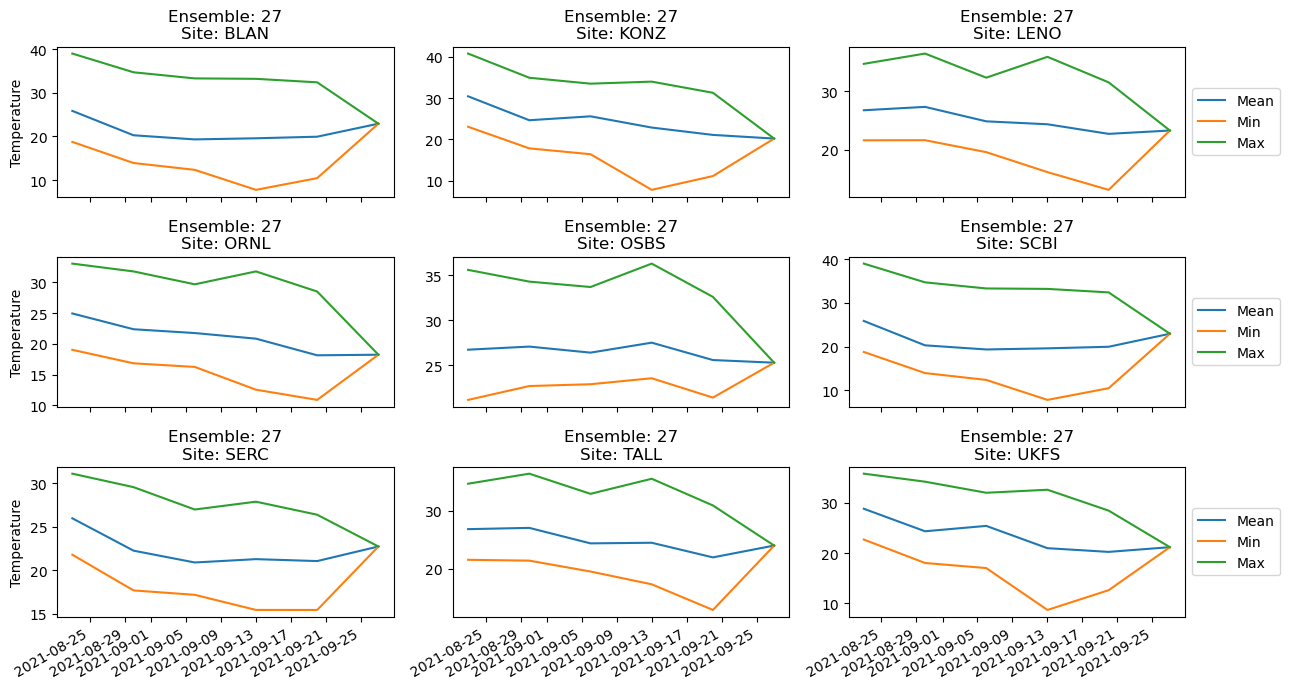

<Figure size 640x480 with 0 Axes>

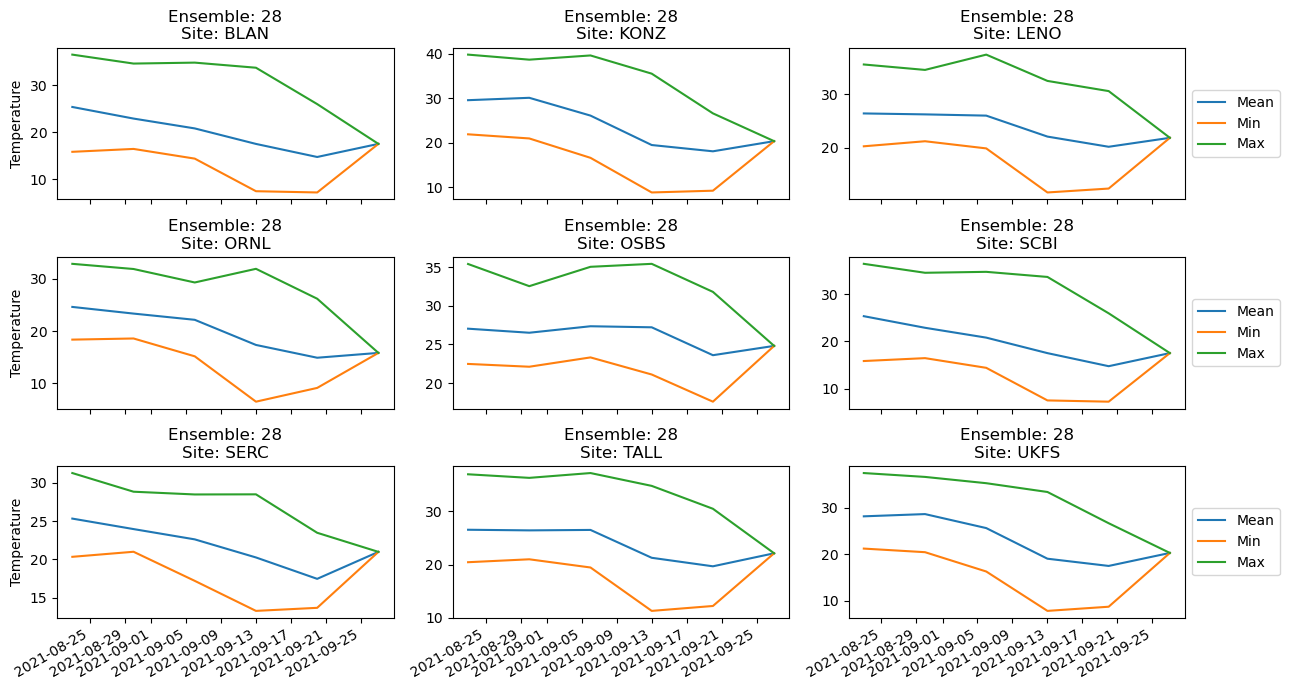

<Figure size 640x480 with 0 Axes>

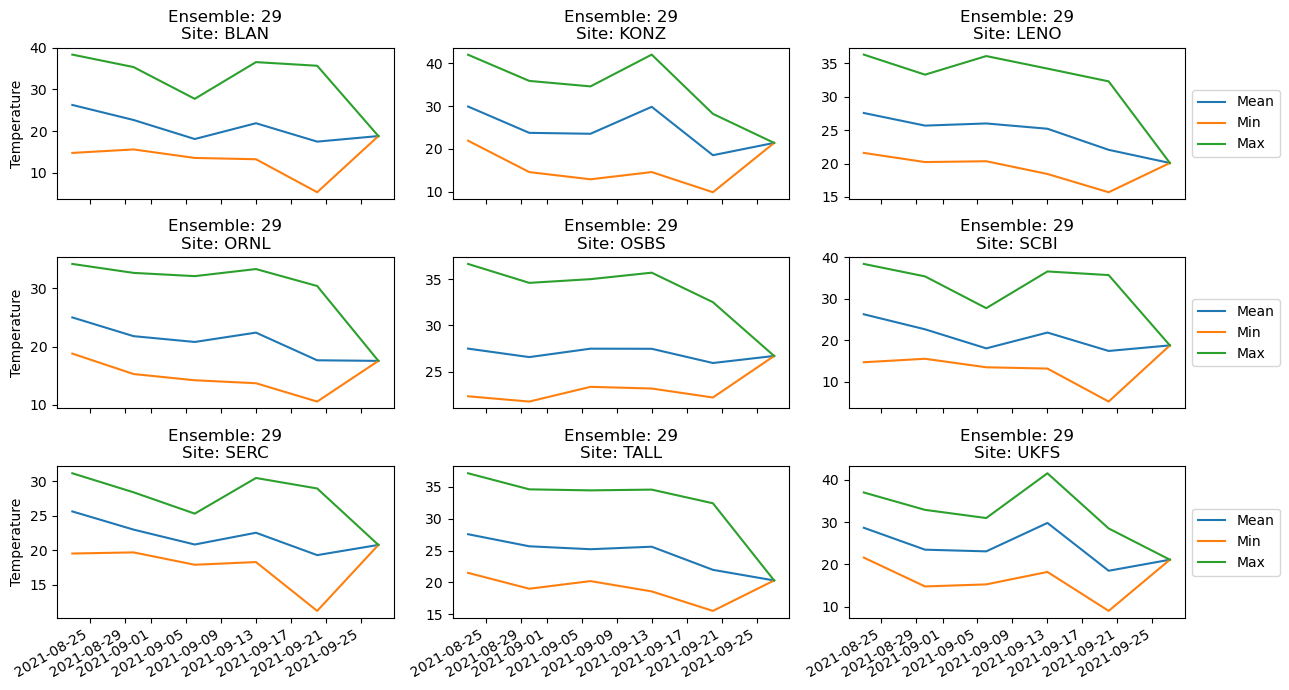

<Figure size 640x480 with 0 Axes>

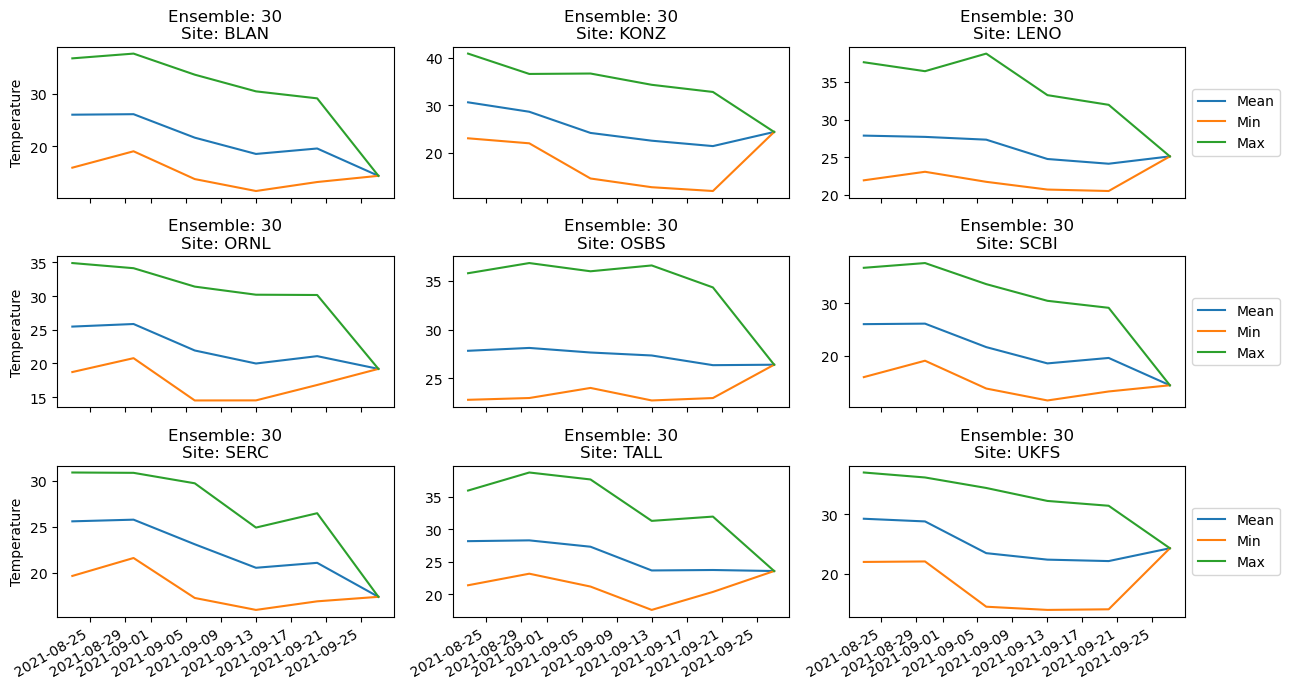

<Figure size 640x480 with 0 Axes>

In [8]:
for j in np.arange(1, 31, 1):
    en = str(j)
    fig = plt.figure(figsize = (13,7))
    for i in np.arange(0, len(draft_forecast.index.get_level_values(0).unique()), 1):
        dclipped = draft_forecast[['mean_temp', 'min_temp', 'max_temp']][(draft_forecast.index.get_level_values(0) == draft_forecast.index.get_level_values(0).unique()[i])
                                                          & (draft_forecast.index.get_level_values(1) == 'basic_arima')]
        plt.subplot(3,3,i+1)
        plt.plot(pd.DataFrame(dclipped[dclipped.index.get_level_values(3) == j]['mean_temp'].values,
                    index = dclipped[dclipped.index.get_level_values(3) == j]['mean_temp'].index.get_level_values(2),
                    columns = ['mean']))
        plt.plot(pd.DataFrame(dclipped[dclipped.index.get_level_values(3) == j]['min_temp'].values,
                    index = dclipped[dclipped.index.get_level_values(3) == j]['min_temp'].index.get_level_values(2),
                    columns = ['min']))
        plt.plot(pd.DataFrame(dclipped[dclipped.index.get_level_values(3) == j]['max_temp'].values,
                    index = dclipped[dclipped.index.get_level_values(3) == j]['max_temp'].index.get_level_values(2),
                    columns = ['max']))
        fig.autofmt_xdate()
        if ((i == 2) or (i == 5) or (i == 8)):
            plt.legend(['Mean', 'Min', 'Max'], loc='center left', bbox_to_anchor=(1, 0.5))
        if ((i == 0) or (i == 3) or (i == 6)):
            plt.ylabel('Temperature')
        plt.title('Ensemble: ' + en + '\nSite: ' + draft_forecast.index.get_level_values(0).unique()[i])
        plt.tight_layout()
    plt.show()
    plt.savefig('forecast_figs/ensemble_' + en +'.png')
    